In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
#import statsmodels.api as sm

In [ ]:
data = pd.read_csv("Monthly_data_cmo.csv", parse_dates=["date"], index_col='date')

In [2]:
data = pd.read_csv("Monthly_data_cmo.csv")

In [3]:
data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [ ]:
data.dtypes

In [ ]:
data.drop(["state_name"], axis = 1, inplace =True)

In [ ]:
data02 = data.copy()

In [ ]:
data02["Commodity"] = [x.lower() for x in data02["Commodity"]]
data02.head()

In [ ]:
data02[data02.duplicated(['APMC', 'Commodity', 'date', 'min_price', 'max_price', 'modal_price'], keep=False)]

In [ ]:
data02[data02.duplicated(['APMC', 'Year', 'Month', 'Commodity', 'min_price'], keep=False)]

In [ ]:
# Converting all Commodity names to lowercase in order to avoid duplicate entries
data["Commodity"] = [x.lower() for x in data["Commodity"]]

# Merging records with same APMC, Commodity, Year and Month


In [ ]:
data02.index.name 

In [ ]:
data02.head()

In [ ]:
df02 = data.groupby(["Commodity", "Year"])

In [ ]:
# Maximum arrival in qtls for each commodity across all APMCs, Years and Months

df01 = data.groupby(["Commodity"])

for com, com_df in df01:
    print(com, "\n")
    print(com_df[["APMC", "Year", "Month", "arrivals_in_qtl"]][com_df["arrivals_in_qtl"] == com_df["arrivals_in_qtl"].max()], "\n\n")

In [ ]:
x = list(df01.groups.keys())
y = df01.arrivals_in_qtl.max()

plt.figure(figsize=(20,15))
sns.barplot(x, y)

In [ ]:
# Total arrival in quintals of a particular commodity through out the time period.

df02 = data[["Commodity", "date", "arrivals_in_qtl"]]
df02.sort_values(by='date', inplace = True)

g = df02.groupby(["Commodity"])

for com, com_df in g:
    print(com)

In [ ]:
data.index

In [ ]:
df = data.copy()

df["Commodity"] = [x.lower() for x in df["Commodity"]]
df.head()

g = df.groupby("Commodity")

for com, com_df in g:
    print(com_df.loc[com_df[["APMC", "Year", "Month"]].duplicated(), :])

# Removing rows which have been accidently recorded. Every value accept 'Arrivals_in_Qtl' is similar.
# So, I add both the values and merge them into a single record

In [ ]:
# Converting all Commodity names to lower case inorder to avoid any discrepancy

data03 = data.copy()
data03["Commodity"] = [x.lower() for x in data03["Commodity"]]
data03.head()

In [ ]:
# Obtaining the columns which seem to have erronous entries

data03[data03.duplicated(['APMC', 'Commodity', 'date', 'min_price', 'max_price', 'modal_price'], keep=False)]

Total 20 records contain erroneous values

Therefore, we add the 'arrivals_in_qtl' for both the records and delete the extra record

In [ ]:
j = np.array(data03.loc[data03.duplicated(['APMC', 'Commodity', 'date', 'min_price', 'max_price', 'modal_price'], keep=False)].index)

In [ ]:
d = []

In [ ]:
for i in range(0, len(j)-1, 2):
    data03.loc[j[i], "arrivals_in_qtl"] = data03.loc[j[i]]["arrivals_in_qtl"] + data03.loc[j[i+1]]["arrivals_in_qtl"]
    d.append(j[i+1])


In [ ]:
data03.loc[j]

In [ ]:
data03.drop(d, inplace = True)

In [ ]:
data03.loc[j]

In [ ]:
data03 = data03[pd.notnull(data03.APMC)]

In [ ]:
data.shape

In [ ]:
# Ten most busiest APMCs

data.APMC.value_counts().head(10)

In [ ]:
# Ten least busiest APMCs

data.APMC.value_counts().tail(10)

In [ ]:
data.head()

# Grouping by [APMC, Commodity]

In [ ]:
g = data.groupby(["Commodity"])

In [ ]:
data.head()

In [ ]:
for k, df in g:
    print(k)
    h = df.groupby("Year")    
    a = h.get_group()
    i = df[df["arrivals_in_qtl"] == df["arrivals_in_qtl"].max()].index
    
    
    #df.sort_values(by = 'date', inplace = True)
    #plt.figure()
    #plt.plot( 'date', 'min_price', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
    #plt.plot( 'date', 'max_price', data=df, marker='', color='olive', linewidth=2)
    #plt.plot( 'date', 'modal_price', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
    #plt.legend()


In [ ]:
df

In [ ]:
df.sort_values(by = 'date', inplace = True)

In [ ]:
ds = data.sample(n = 50, replace = True)

In [ ]:
g = ds.groupby(["APMC", "Commodity"])

In [ ]:
for k, df in g:
    print(k)
    df.sort_values(by = 'date', inplace = True)
    plt.figure()
    plt.plot( 'date', 'min_price', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
    plt.plot( 'date', 'max_price', data=df, marker='*', color='olive', linewidth=2)
    plt.plot( 'date', 'modal_price', data=df, marker='+', color='red', linewidth=2, linestyle='dashed', label="modal_price")
    plt.title(k)
    plt.legend()

# Using both data files

In [ ]:
file = pd.read_csv("CMO_MSP_Mandi.csv")

In [ ]:
file.head()

In [ ]:
file.commodity.unique()

In [ ]:
file.drop(file[file["year"] < 2014].index, inplace = True)

In [ ]:
file.shape

In [ ]:
file.head()

In [ ]:
file.msp_filter.unique()

In [ ]:
file.drop(["msp_filter"], axis = 1, inplace =True)

In [ ]:
file.commodity.unique().shape

In [ ]:
file.head()

In [ ]:
data["Commodity"] = [x.lower() for x in data["Commodity"]]

In [ ]:
file["commodity"] = [x.lower() for x in file["commodity"]]

In [ ]:
file[file.duplicated(['commodity', 'year', 'Type'], keep=False)]

#Therefore, no duplicate records

In [ ]:
file.columns = ['Commodity', 'Year', 'Type', 'ms_price']

In [ ]:
file.head()

In [ ]:
combines = pd.merge(file, data, on = ['Commodity', 'Year'], how = 'inner')

In [ ]:
combines.head()

In [ ]:
combines.drop(["Month", "district_name"], axis = 1, inplace =True)

In [ ]:
combines.head()

In [ ]:
combines = combines[['Commodity', 'APMC', 'Year', 'date', 'min_price', 'modal_price', 'max_price', 'ms_price', 'arrivals_in_qtl']]

In [ ]:
combines.head()

In [ ]:
g =  combines.groupby(["Commodity", "APMC"])

In [ ]:
idx = np.array([])
idx

In [ ]:
for k, df in g:
    print(k)
    df.sort_values(by = 'date')
    plt.figure()
    plt.plot( 'date', 'min_price', data=df, marker='+', color='blue', label = "Minimum Price")
    plt.plot( 'date', 'max_price', data=df, marker='s', color='green', label = "Maximum Price")
    plt.plot( 'date', 'modal_price', data=df, marker='o', color='yellow', label="Modal Price")
    plt.plot( 'date', 'ms_price', data=df, marker='*', color='red', label="Minimum Support Price")
    plt.title(k)
    plt.legend()

In [ ]:
df

In [ ]:
    plt.plot( 'date', 'min_price', data=df, marker='+', color='blue', label = "Minimum Price")
    plt.plot( 'date', 'max_price', data=df, marker='s', color='green', label = "Maximum Price")
    plt.plot( 'date', 'modal_price', data=df, marker='o', color='yellow', label="Modal Price")
    plt.plot( 'date', 'ms_price', data=df, marker='*', color='red', label="Minimum Support Price")
    plt.title(k)
    l = plt.legend()
    l

In [ ]:
idx = combines[combines["min_price"] < combines["ms_price"]]

In [ ]:
idx.head()

In [ ]:
idx.shape

In [ ]:
idx.Commodity.value_counts()

In [ ]:
idx.APMC.value_counts()

In [ ]:
file.isnull().sum()

In [ ]:
file[file.ms_price.isnull()]

In [ ]:
f = file.copy()

In [ ]:
f.dropna(inplace = True)

In [ ]:
f.shape

In [ ]:
file.shape

In [ ]:
c = pd.merge(f, data, on=["Commodity", "Year"])

In [ ]:
c.shape

In [ ]:
combines.shape

In [ ]:
combines.head()

In [ ]:
data.head()

In [ ]:
data.Month.unique().shape

In [ ]:
s = ["March", "April", "May", "June"]
w = ["November", "December", "January", "February"]
m = ["July", "August", "September", "October"]

In [ ]:
z = data.copy()

In [ ]:
sa = []

for a in z.Month:
    print(a)
    if a in ["March", "April", "May", "June"]:
        sa.append("S")
        
    elif a in ["November", "December", "January", "February"]:
        sa.append("W")
        
    else:
        sa.append("M")

In [ ]:
z["Season"] = sa

In [ ]:
z.head()

In [ ]:
j = data.copy()

In [ ]:
h = data.groupby(["APMC", "Commodity", "Year"])

In [ ]:
for k, df in h:
    print(k)
    df.sort_values(by = 'date')
    pr = df["modal_price"]

# Seasonal Decomposition

In [ ]:
data.head()

In [24]:
sdata = data.sample(n = 20000)

In [25]:
sdata.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
27256,Kalmeshwar,Raddish,2016,April,54,747,976,917,2016-04,Nagpur,Maharashtra
36976,Kalamb (Os),Tamarind,2015,April,76,4071,4187,4137,2015-04,Osmanabad,Maharashtra
22315,Ashti (Jalna),Jaggery,2015,October,3,2511,2511,2511,2015-10,Jalna,Maharashtra
22655,Kolhapur,Maize(Corn.),2016,April,168,392,1283,683,2016-04,Kolhapur,Maharashtra
13307,Buldhana-Dhad,Soybean,2016,January,10240,3514,3645,3575,2016-01,Buldhana,Maharashtra


In [ ]:
sdata.dtypes

In [ ]:
sdata.index

In [26]:
sdata["date"] = pd.to_datetime(sdata["date"])

In [ ]:
pd.DatetimeIndex.freq = None

In [27]:
sdata = sdata.set_index(sdata["date"])

In [ ]:
sdata.date

In [ ]:
sdata.shape

In [ ]:
sdata["min_price"].head()

In [ ]:
h = sdata.groupby(["APMC", "Commodity"])

In [8]:
minprice = sdata[["APMC", "Commodity", "min_price"]]
minprice.head()

,APMC,Commodity,min_price
date,,,
2016-02-01,Shirpur,Sesamum,3667
2016-05-01,Khed-Chakan,Onion,444
2015-06-01,Vaijapur,Safflower,2564
2015-11-01,Katol,Wheat(Husked),1498
2015-01-01,Chalisgaon,Soybean,3078


In [ ]:
minprice.index

In [ ]:
h = minprice.groupby(["APMC", "Commodity"])

In [ ]:
a = sdata["min_price"]
a.head()

In [ ]:
a.index

In [ ]:
a = pd.Series(a, index = a.index)

In [ ]:
a.head()
a.sort_values(by = a.index)

In [ ]:
dec = seasonal_decompose(a, model = 'additive', freq = 12)
trend = dec.trend
seas = dec.seasonal
resid = dec.resid
print(trend)
print(seas)
print(resid)

('Aamgaon', 'Paddy-Unhusked')
('Aarni', 'Gram')
('Aarni', 'Pigeon Pea (Tur)')
('Aarni', 'Sorgum(Jawar)')
('Aarni', 'Soybean')
('Aarni', 'Wheat(Husked)')
('Achalpur', 'Bajri')
('Achalpur', 'Batbati')
('Achalpur', 'Black Gram')
('Achalpur', 'GRAM')
('Achalpur', 'Gram')
('Achalpur', 'Green Gram')
('Achalpur', 'Ground Nut Pods (Dry)')
('Achalpur', 'Lentil')
('Achalpur', 'Maize')
('Achalpur', 'Mustard')
('Achalpur', 'Pigeon Pea (Tur)')
('Achalpur', 'SORGUM(JAWAR)')
('Achalpur', 'SOYBEAN')
('Achalpur', 'Sesamum')
('Achalpur', 'Sorgum(Jawar)')
('Achalpur', 'Soybean')
('Achalpur', 'Sunflower')
('Achalpur', 'Wheat(Husked)')
('Aheri', 'Batbati')
('Aheri', 'COTTON')
('Aheri', 'Cotton')
('Aheri', 'Gram')
('Aheri', 'Green Gram')
('Aheri', 'Ground Nut Pods (Dry)')
('Aheri', 'Horse Gram')
('Aheri', 'Indian Bean')
('Aheri', 'Linseed')
('Aheri', 'Maize')
('Aheri', 'Matki')
('Aheri', 'Paddy-Unhusked')
('Aheri', 'Pigeon Pea (Tur)')
('Aheri', 'Rice(Paddy-Hus)')
('Aheri', 'SESAMUM')
('Aheri', 'Sesamum')
('

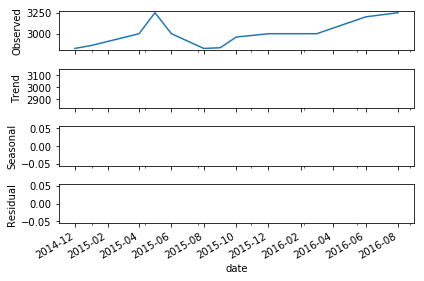

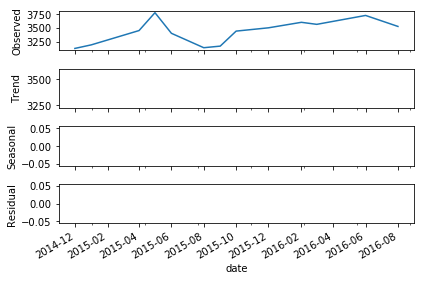

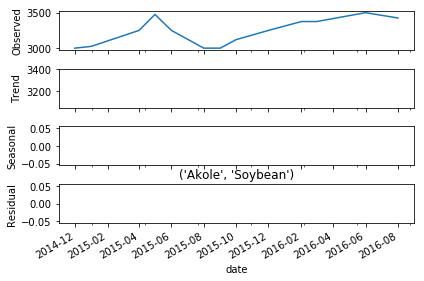

('Akole', 'Tomato')
('Akole', 'Wheat(Husked)')
('Akot', 'Black Gram')
('Akot', 'COTTON')
('Akot', 'Cotton')
('Akot', 'Gram')
('Akot', 'Green Gram')
('Akot', 'Maize')
('Akot', 'Pigeon Pea (Tur)')
('Akot', 'Sorgum(Jawar)')
('Akot', 'Soybean')
('Akot', 'Sunflower')
('Akot', 'Thymol/Lovage')
('Akot', 'Wheat(Husked)')
('Alibag', 'Betelnuts')
('Alibag', 'Coconut')
('Alibag', 'Paddy-Unhusked')
('Alibag', 'RICE(PADDY-HUS)')
('Alibag', 'Rice(Paddy-Hus)')
('Amalner', 'BLACK GRAM')
('Amalner', 'Bajri')
('Amalner', 'Black Gram')
('Amalner', 'Coriander (Dry)')
('Amalner', 'Cowpea')
('Amalner', 'GROUND NUT PODS (DRY)')
('Amalner', 'Gram')
('Amalner', 'Green Gram')
('Amalner', 'Ground Nut Pods (Dry)')
('Amalner', 'Maize')
('Amalner', 'Matki')
('Amalner', 'Pigeon Pea (Tur)')
('Amalner', 'SESAMUM')
('Amalner', 'SOYBEAN')
('Amalner', 'Sesamum')
('Amalner', 'Sorgum(Jawar)')
('Amalner', 'Soybean')
('Amalner', 'Wheat(Husked)')
('Amarawati', 'Amba Koy')
('Amarawati', 'Apple')
('Amarawati', 'Awala')
('Amaraw

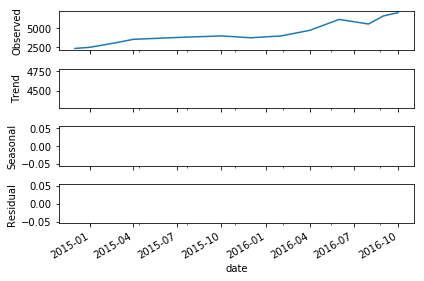

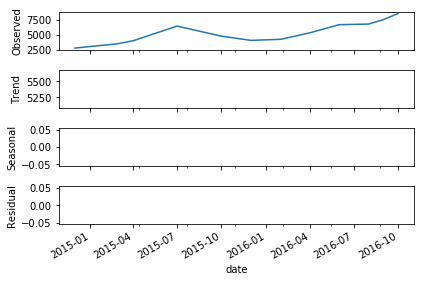

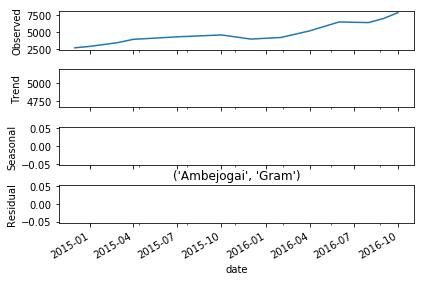

('Ambejogai', 'Green Gram')
('Ambejogai', 'Maize')
('Ambejogai', 'PIGEON PEA (TUR)')
('Ambejogai', 'Pigeon Pea (Tur)')
('Ambejogai', 'SOYBEAN')
('Ambejogai', 'Safflower')
('Ambejogai', 'Sesamum')
('Ambejogai', 'Sorgum(Jawar)')
('Ambejogai', 'Soybean')
('Ambejogai', 'Sunflower')
('Ambejogai', 'Wheat(Husked)')
('Anajngaon Surji', 'Banana')
('Anajngaon Surji', 'Black Gram')
('Anajngaon Surji', 'CHILLIES(RED)')
('Anajngaon Surji', 'Chillies(Red)')


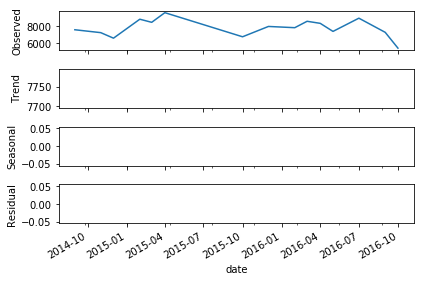

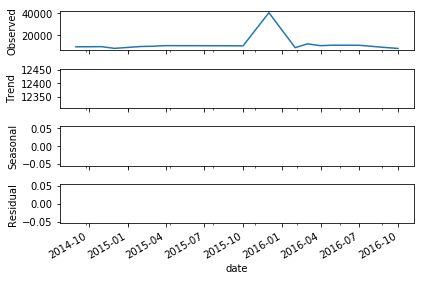

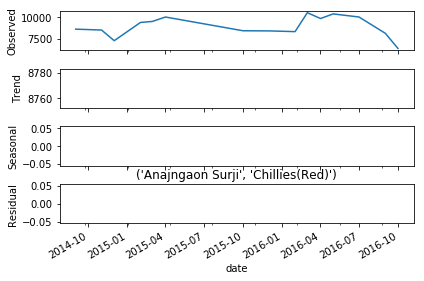

('Anajngaon Surji', 'Gram')
('Anajngaon Surji', 'Green Gram')
('Anajngaon Surji', 'Ground Nut Pods (Dry)')
('Anajngaon Surji', 'Pigeon Pea (Tur)')
('Anajngaon Surji', 'SORGUM(JAWAR)')
('Anajngaon Surji', 'Sesamum')
('Anajngaon Surji', 'Sorgum(Jawar)')
('Anajngaon Surji', 'Soybean')


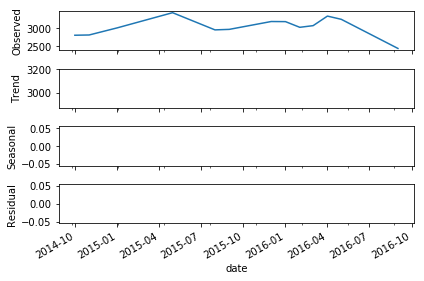

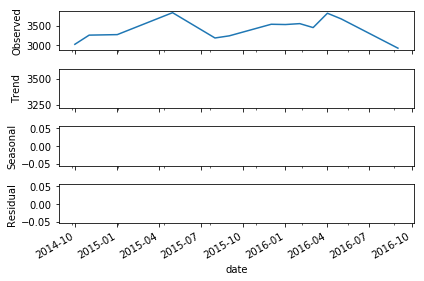

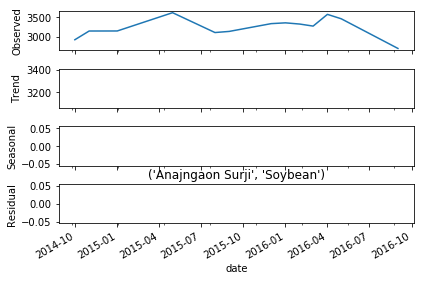

('Anajngaon Surji', 'Sunflower')
('Anajngaon Surji', 'WHEAT(HUSKED)')
('Anajngaon Surji', 'Wheat(Husked)')
('Arjuni Morgaon', 'Paddy-Unhusked')
('Armori', 'Ground Nut Pods (Dry)')
('Armori', 'Paddy-Unhusked')
('Armori-Desaiganj', 'Chillies(Red)')
('Armori-Desaiganj', 'PADDY-UNHUSKED')
('Armori-Desaiganj', 'Paddy-Unhusked')
('Arvi', 'Cotton')
('Arvi', 'Gram')
('Arvi', 'Pigeon Pea (Tur)')
('Arvi', 'Soybean')
('Ashti (Jalna)', 'Bajri')
('Ashti (Jalna)', 'Green Gram')
('Ashti (Jalna)', 'Jaggery')
('Ashti (Jalna)', 'Maize')
('Ashti (Jalna)', 'Pigeon Pea (Tur)')
('Ashti (Jalna)', 'Sesamum')
('Ashti (Jalna)', 'Sorgum(Jawar)')
('Ashti (Jalna)', 'Wheat(Husked)')
('Ashti (Wardha)', 'Cotton')
('Ashti-Karanja', 'Pigeon Pea (Tur)')
('Ashti-Karanja', 'Soybean')
('Ashti-Karanja', 'Wheat(Husked)')
('Atpadi', 'Bajri')
('Atpadi', 'Cotton')
('Atpadi', 'MAIZE')
('Atpadi', 'Maize')
('Atpadi', 'Pomegranate')
('Atpadi', 'Sorgum(Jawar)')
('Aurad Shahajani', 'Gram')
('Aurad Shahajani', 'Green Gram')
('Aurad Sh

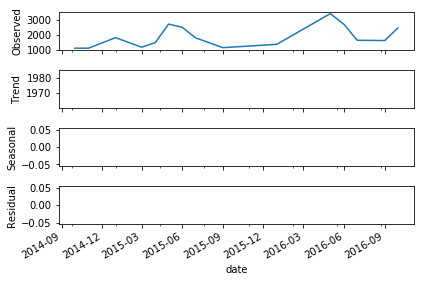

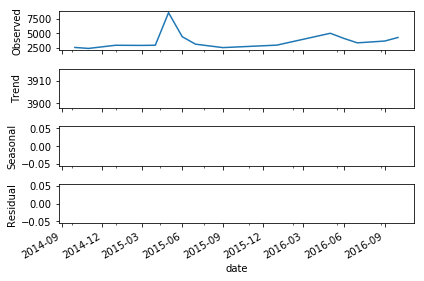

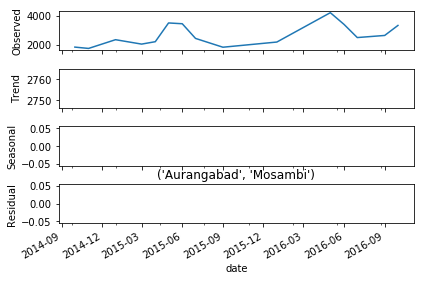

('Aurangabad', 'ONION')
('Aurangabad', 'ORANGE')
('Aurangabad', 'Onion')
('Aurangabad', 'Orange')
('Aurangabad', 'PAPAI')
('Aurangabad', 'POTATO')
('Aurangabad', 'Papai')
('Aurangabad', 'Pomegranate')
('Aurangabad', 'Potato')
('Aurangabad', 'Ridge Gourd')
('Aurangabad', 'SHEVGA')
('Aurangabad', 'SWEET POTATO')
('Aurangabad', 'Shevga')
('Aurangabad', 'Sorgum(Jawar)')
('Aurangabad', 'Soybean')
('Aurangabad', 'Spinach')
('Aurangabad', 'Sweet Potato')
('Aurangabad', 'Tomato')
('Aurangabad', 'Wal Bhaji')
('Aurangabad', 'Wheat(Husked)')
('Aurangabad', 'Zendu')
('Ausa', 'BLACK GRAM')
('Ausa', 'Bajri')
('Ausa', 'Black Gram')
('Ausa', 'Castor Seed')
('Ausa', 'Coriander (Dry)')
('Ausa', 'Gram')
('Ausa', 'Green Gram')
('Ausa', 'Ground Nut Pods (Dry)')
('Ausa', 'Jaggery')
('Ausa', 'Linseed')
('Ausa', 'Maize')
('Ausa', 'Mustard')
('Ausa', 'Niger-Seed')
('Ausa', 'PIGEON PEA (TUR)')
('Ausa', 'Paddy-Unhusked')
('Ausa', 'Pigeon Pea (Tur)')
('Ausa', 'SAFFLOWER')
('Ausa', 'SORGUM(JAWAR)')
('Ausa', 'Saffl

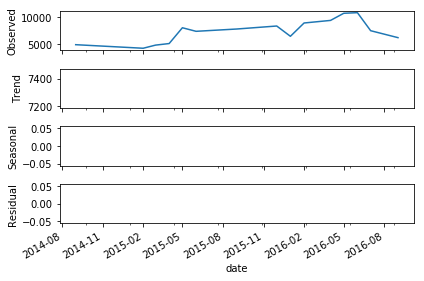

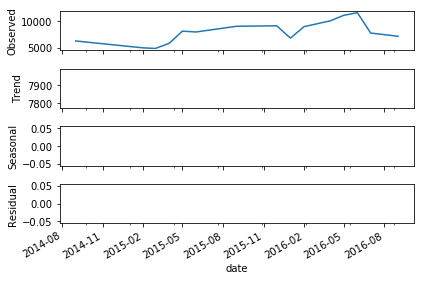

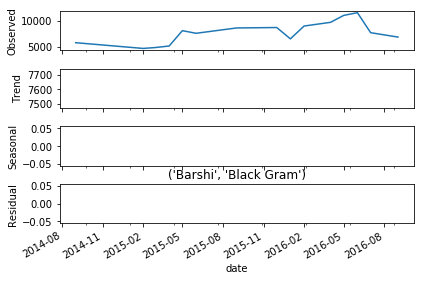

('Barshi', 'Bor')
('Barshi', 'Brinjal')
('Barshi', 'CORIANDER ')
('Barshi', 'CUSTARD APPLE')
('Barshi', 'Cabbage')


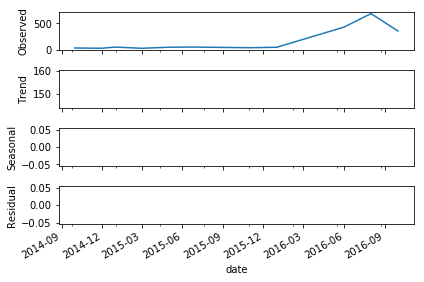

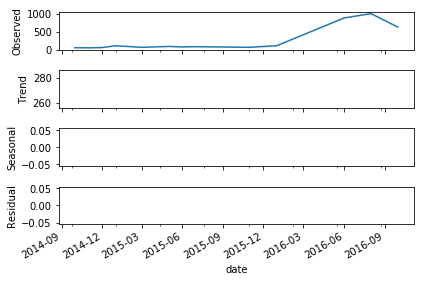

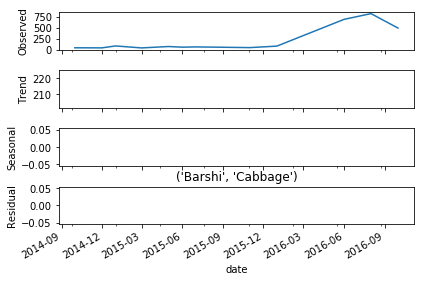

('Barshi', 'Capsicum')
('Barshi', 'Carrot')
('Barshi', 'Castor Seed')
('Barshi', 'Chikoo')
('Barshi', 'Cluster Bean')
('Barshi', 'Coriander  ')
('Barshi', 'Coriander (Dry)')
('Barshi', 'Cowpea')
('Barshi', 'Cucumber')
('Barshi', 'FODDER')
('Barshi', 'Flower')
('Barshi', 'Fodder')
('Barshi', 'GHEVDA')
('Barshi', 'GREEN CHILLI')
('Barshi', 'Ghevda')
('Barshi', 'Gram')
('Barshi', 'Grapes')
('Barshi', 'Green Chilli')
('Barshi', 'Green Gram')
('Barshi', 'Ground Nut Pods (Dry)')
('Barshi', 'Guava')
('Barshi', 'Jambhul')
('Barshi', 'Kanda Pat')
('Barshi', 'Kharbuj')
('Barshi', 'LEMON')
('Barshi', 'Ladies Finger')
('Barshi', 'Lemon')
('Barshi', 'Maize')
('Barshi', 'Mango')
('Barshi', 'Matki')
('Barshi', 'Methi (Bhaji)')
('Barshi', 'Mosambi')
('Barshi', 'Mustard')
('Barshi', 'Neem-Seed')
('Barshi', 'Onion')
('Barshi', 'Other Cereals')
('Barshi', 'Other Pulses')
('Barshi', 'PADDY-UNHUSKED')
('Barshi', 'Paddy-Unhusked')
('Barshi', 'Pigeon Pea (Tur)')
('Barshi', 'Pomegranate')
('Barshi', 'Raddish'

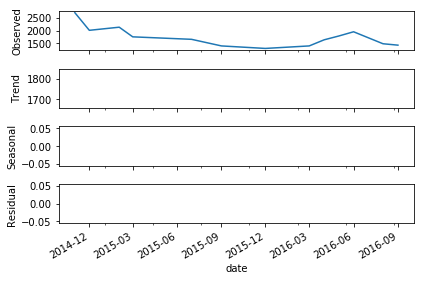

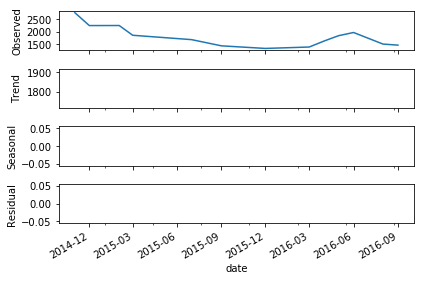

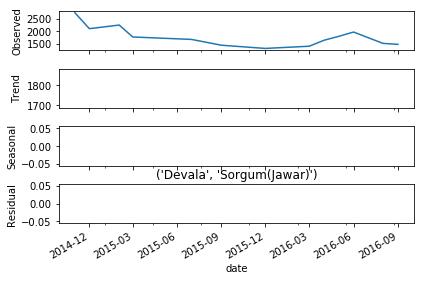

('Devala', 'Sweet Potato')
('Devala', 'Tag')
('Devala', 'Tamarind')
('Devala', 'Wheat(Husked)')
('Devani', 'BLACK GRAM')
('Devani', 'GRAM')
('Devani', 'Gram')
('Devani', 'Pigeon Pea (Tur)')
('Devani', 'SAFFLOWER')
('Devani', 'SOYBEAN')
('Devani', 'Sorgum(Jawar)')
('Devri', 'Paddy-Unhusked')
('Dhadgaon', 'Bhagar/Vari')
('Dhadgaon', 'Maize')
('Dhadgaon', 'SORGUM(JAWAR)')
('Dhadgaon', 'Sorgum(Jawar)')
('Dhadgaon', 'Wheat(Husked)')
('Dhamangaon-Rly', 'BLACK GRAM')
('Dhamangaon-Rly', 'Black Gram')
('Dhamangaon-Rly', 'COTTON')
('Dhamangaon-Rly', 'Cotton')
('Dhamangaon-Rly', 'GREEN GRAM')
('Dhamangaon-Rly', 'Gram')
('Dhamangaon-Rly', 'Green Gram')
('Dhamangaon-Rly', 'Ground Nut Pods (Dry)')
('Dhamangaon-Rly', 'PIGEON PEA (TUR)')
('Dhamangaon-Rly', 'Pigeon Pea (Tur)')
('Dhamangaon-Rly', 'Soybean')
('Dhamangaon-Rly', 'WHEAT(HUSKED)')
('Dhamangaon-Rly', 'Wheat(Husked)')
('Dharangaon', 'Bajri')
('Dharangaon', 'Black Gram')
('Dharangaon', 'Gram')
('Dharangaon', 'Green Gram')
('Dharangaon', 'Maize'

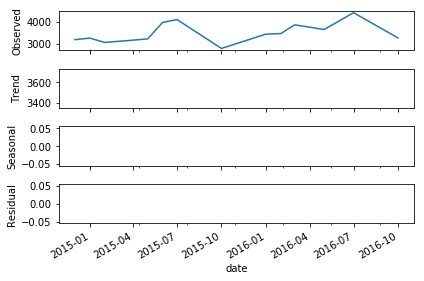

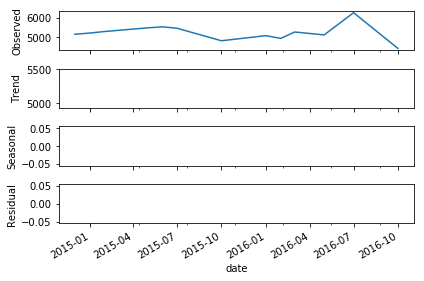

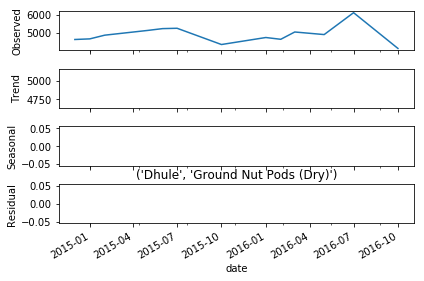

('Dhule', 'Horse Gram')
('Dhule', 'Kanda Pat')
('Dhule', 'Maize')
('Dhule', 'Matki')
('Dhule', 'Onion')
('Dhule', 'Pigeon Pea (Tur)')
('Dhule', 'SOYBEAN')
('Dhule', 'Sesamum')
('Dhule', 'Sorgum(Jawar)')
('Dhule', 'Soybean')
('Dhule', 'Wheat(Husked)')
('Digras', 'Bajri')
('Digras', 'Black Gram')
('Digras', 'Cotton')
('Digras', 'Gram')
('Digras', 'Green Gram')
('Digras', 'Pigeon Pea (Tur)')
('Digras', 'Rice(Paddy-Hus)')
('Digras', 'Sesamum')
('Digras', 'Sorgum(Jawar)')
('Digras', 'Soybean')
('Digras', 'WHEAT(HUSKED)')
('Digras', 'Wheat(Husked)')
('Dindori', 'Onion')
('Dindori-Vani', 'Onion')
('Dondaicha', 'Bajri')
('Dondaicha', 'Black Gram')
('Dondaicha', 'Chillies(Red)')
('Dondaicha', 'GREEN GRAM')
('Dondaicha', 'GROUND NUT PODS (DRY)')
('Dondaicha', 'Gram')
('Dondaicha', 'Green Gram')
('Dondaicha', 'Ground Nut Pods (Dry)')
('Dondaicha', 'MAIZE')
('Dondaicha', 'Maize')


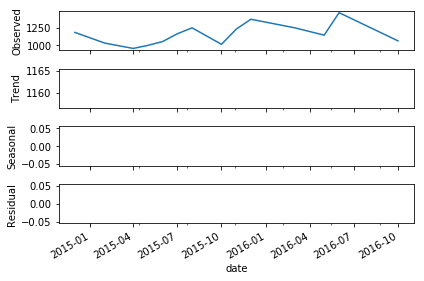

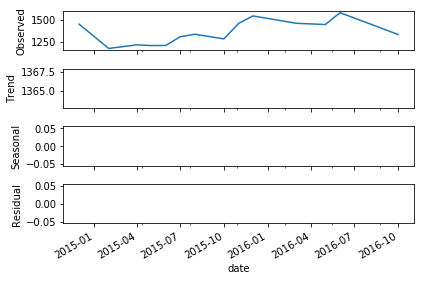

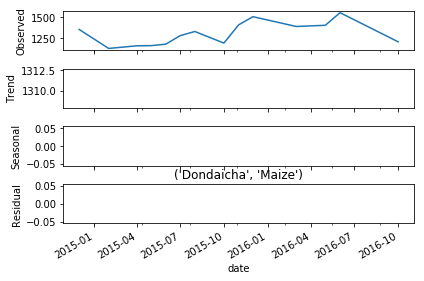

('Dondaicha', 'Matki')
('Dondaicha', 'Pigeon Pea (Tur)')
('Dondaicha', 'SORGUM(JAWAR)')
('Dondaicha', 'Sorgum(Jawar)')
('Dondaicha', 'Soybean')
('Dondaicha', 'Wheat(Husked)')
('Dondaicha-Sindkheda', 'Bajri')
('Dondaicha-Sindkheda', 'Black Gram')
('Dondaicha-Sindkheda', 'GRAM')
('Dondaicha-Sindkheda', 'Gram')
('Dondaicha-Sindkheda', 'Green Gram')
('Dondaicha-Sindkheda', 'Ground Nut Pods (Dry)')
('Dondaicha-Sindkheda', 'Maize')
('Dondaicha-Sindkheda', 'Matki')
('Dondaicha-Sindkheda', 'Pigeon Pea (Tur)')
('Dondaicha-Sindkheda', 'Sorgum(Jawar)')
('Dondaicha-Sindkheda', 'WHEAT(HUSKED)')
('Dondaicha-Sindkheda', 'Wheat(Husked)')
('Dound', 'Bajri')
('Dound', 'Cowpea')
('Dound', 'Gram')
('Dound', 'Green Gram')
('Dound', 'Ground Nut Pods (Dry)')
('Dound', 'Lemon')
('Dound', 'MAIZE')
('Dound', 'Maize')
('Dound', 'Pigeon Pea (Tur)')
('Dound', 'Sorgum(Jawar)')
('Dound', 'WHEAT(HUSKED)')
('Dound', 'Wheat(Husked)')
('Dudhani', 'Bajri')
('Dudhani', 'Black Gram')
('Dudhani', 'GREEN GRAM')
('Dudhani', '

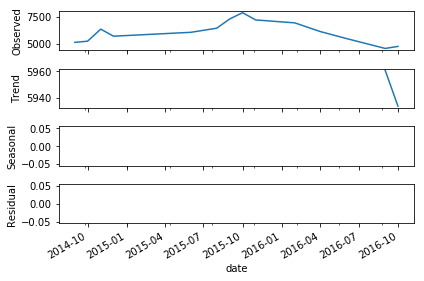

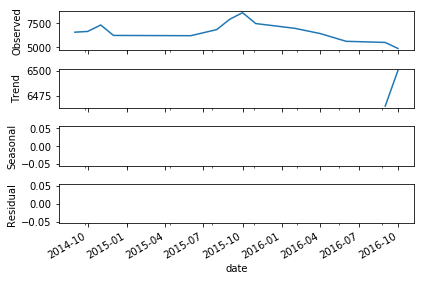

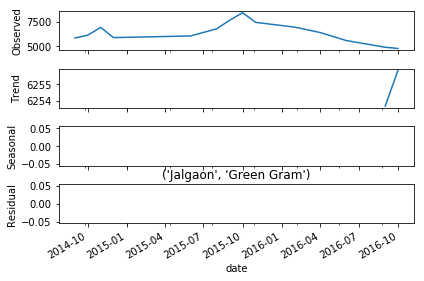

('Jalgaon', 'Guava')
('Jalgaon', 'JAGGERY')
('Jalgaon', 'Jaggery')
('Jalgaon', 'Jambhul')
('Jalgaon', 'LADIES FINGER')
('Jalgaon', 'Ladies Finger')
('Jalgaon', 'Lemon')
('Jalgaon', 'Maize')
('Jalgaon', 'Maize(Corn.)')
('Jalgaon', 'Mango')
('Jalgaon', 'Mango(Raw)')
('Jalgaon', 'Melon')
('Jalgaon', 'Methi (Bhaji)')
('Jalgaon', 'Mosambi')
('Jalgaon', 'ONION')
('Jalgaon', 'Onion')
('Jalgaon', 'Orange')
('Jalgaon', 'Papai')
('Jalgaon', 'Pigeon Pea (Tur)')
('Jalgaon', 'Pomegranate')
('Jalgaon', 'Potato')
('Jalgaon', 'Rajgira')
('Jalgaon', 'SPINACH')
('Jalgaon', 'Sesamum')
('Jalgaon', 'Shevga')
('Jalgaon', 'Sorgum(Jawar)')
('Jalgaon', 'Soybean')
('Jalgaon', 'Spinach')
('Jalgaon', 'Squash Gourd')
('Jalgaon', 'Sweet Potato')
('Jalgaon', 'TOMATO')
('Jalgaon', 'Tomato')
('Jalgaon', 'WAL PAPDI')
('Jalgaon', 'Wal Papdi')
('Jalgaon', 'Wheat(Husked)')
('Jalgaon Jamod', 'Cotton')
('Jalgaon Jamod', 'Gram')
('Jalgaon Jamod', 'Green Gram')
('Jalgaon Jamod', 'Ground Nut Pods (Dry)')
('Jalgaon Jamod', 'MAI

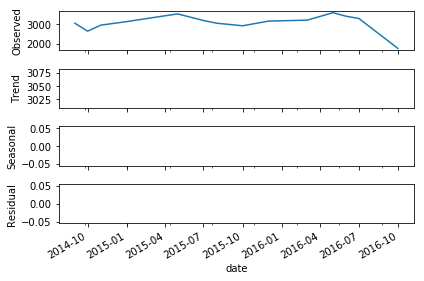

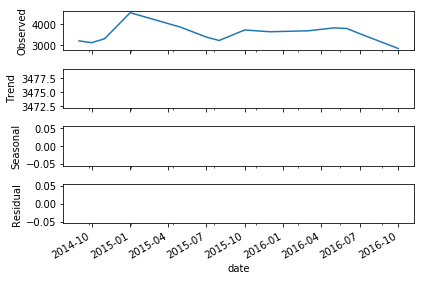

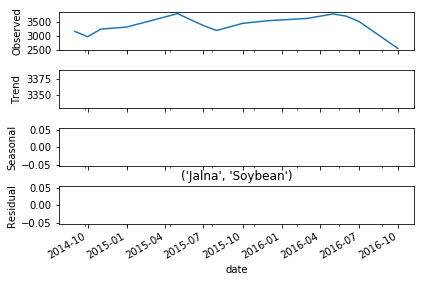

('Jalna', 'Sunflower')
('Jalna', 'Wheat(Husked)')
('Jalna-Badnapur', 'Bajri')
('Jalna-Badnapur', 'Cotton')
('Jalna-Badnapur', 'Maize')
('Jalna-Badnapur', 'Pigeon Pea (Tur)')
('Jalna-Badnapur', 'Sorgum(Jawar)')
('Jalna-Badnapur', 'Wheat(Husked)')
('Jamkhed', 'BLACK GRAM')
('Jamkhed', 'Bajri')
('Jamkhed', 'Black Gram')
('Jamkhed', 'Coriander (Dry)')
('Jamkhed', 'Cotton')
('Jamkhed', 'GRAM')
('Jamkhed', 'Gram')
('Jamkhed', 'Green Gram')
('Jamkhed', 'Maize')
('Jamkhed', 'Onion')
('Jamkhed', 'Pigeon Pea (Tur)')
('Jamkhed', 'Sorgum(Jawar)')
('Jamkhed', 'Soybean')
('Jamkhed', 'WHEAT(HUSKED)')
('Jamkhed', 'Wheat(Husked)')
('Jamner', 'Black Gram')
('Jamner', 'Cotton')
('Jamner', 'Maize')
('Jamner-Neri', 'Black Gram')
('Jamner-Neri', 'Cotton')
('Jamner-Neri', 'MAIZE')
('Jamner-Neri', 'Maize')
('Jawala-Bajar', 'Gram')
('Jawala-Bajar', 'Ground Nut Pods (Dry)')
('Jawala-Bajar', 'Pigeon Pea (Tur)')
('Jawala-Bajar', 'Sorgum(Jawar)')
('Jawala-Bajar', 'Soybean')
('Jawala-Bajar', 'Turmeric')
('Jawala-Ba

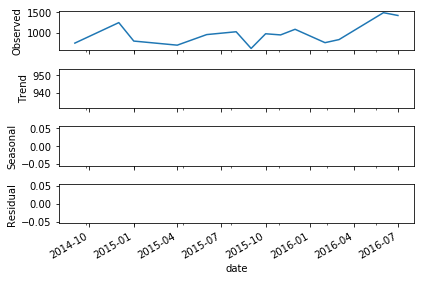

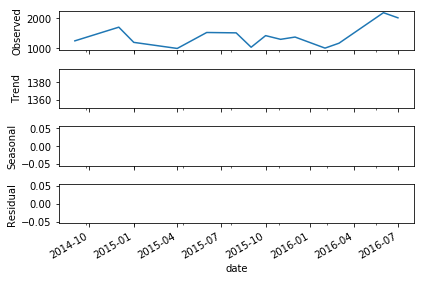

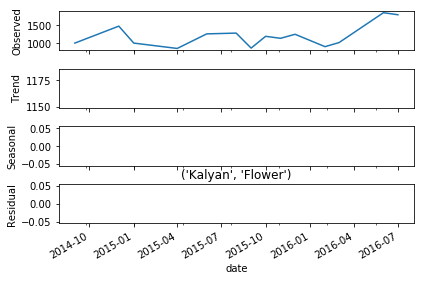

('Kalyan', 'GARLIC')
('Kalyan', 'GUAVA')
('Kalyan', 'Garlic')
('Kalyan', 'Ghevda')
('Kalyan', 'Gr.Nut Kernels')
('Kalyan', 'Gram')
('Kalyan', 'Grapes')
('Kalyan', 'Green Chilli')
('Kalyan', 'Green Gram')
('Kalyan', 'Green Peas (Dry)')
('Kalyan', 'Green-Peas')
('Kalyan', 'Guava')
('Kalyan', 'Gulchadi')
('Kalyan', 'Indian Bean')
('Kalyan', 'Jaggery')
('Kalyan', 'Kagda')
('Kalyan', 'LEMON')
('Kalyan', 'Ladies Finger')
('Kalyan', 'Lemon')
('Kalyan', 'Mango')
('Kalyan', 'Matki')
('Kalyan', 'Mosambi')
('Kalyan', 'ONION')
('Kalyan', 'ORANGE')
('Kalyan', 'Onion')
('Kalyan', 'Orange')
('Kalyan', 'Paddy-Unhusked')
('Kalyan', 'Papai')
('Kalyan', 'Potato')
('Kalyan', 'RIDGE GOURD')
('Kalyan', 'Raddish')
('Kalyan', 'Rice(Paddy-Hus)')
('Kalyan', 'Ridge Gourd')
('Kalyan', 'SHEPU')
('Kalyan', 'Sesamum')
('Kalyan', 'Shevga')
('Kalyan', 'Shewanti')
('Kalyan', 'Small Gourd')
('Kalyan', 'Sorgum(Jawar)')
('Kalyan', 'Squash Gourd')
('Kalyan', 'Tomato')
('Kalyan', 'Wheat(Husked)')
('Kamthi', 'AMBAT CHUKA')
(

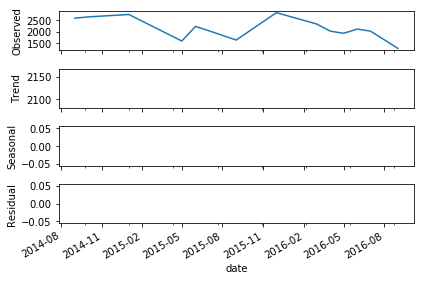

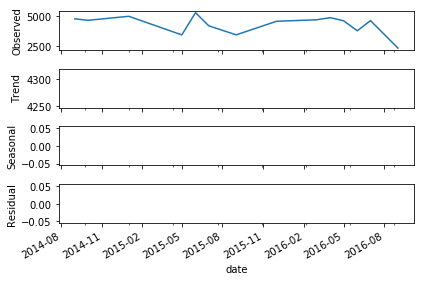

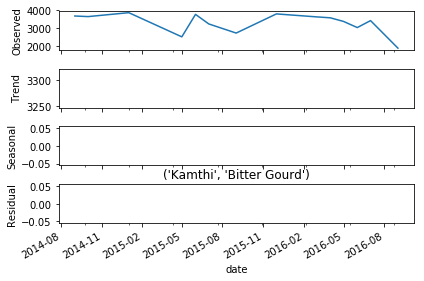

('Kamthi', 'Bottle Gourd')
('Kamthi', 'Brinjal')
('Kamthi', 'CAPSICUM')
('Kamthi', 'CHAVLI (PALA)')
('Kamthi', 'CHAVLI (SHENGA )')
('Kamthi', 'Cabbage')
('Kamthi', 'Capsicum')


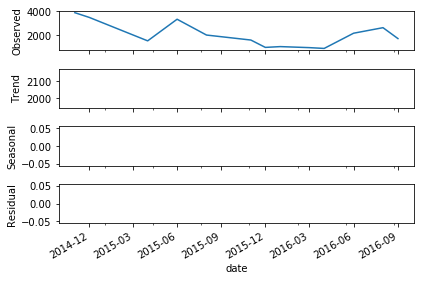

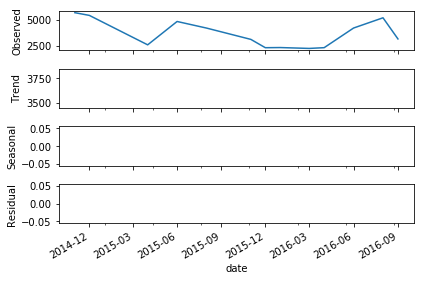

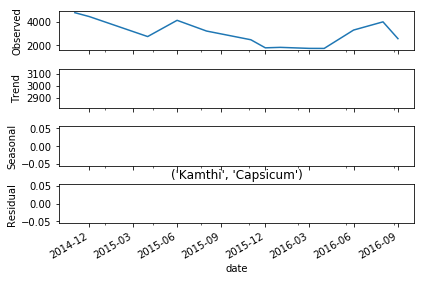

('Kamthi', 'Carrot')
('Kamthi', 'Chavli (Pala)')
('Kamthi', 'Chavli (Shenga )')
('Kamthi', 'Cluster Bean')
('Kamthi', 'Coriander  ')
('Kamthi', 'Cucumber')
('Kamthi', 'Custard Apple')
('Kamthi', 'Dhemse')
('Kamthi', 'Elephant Root')
('Kamthi', 'FLOWER')
('Kamthi', 'Flower')
('Kamthi', 'Garlic')
('Kamthi', 'Ginger (Fresh)')
('Kamthi', 'Green Chilli')
('Kamthi', 'Green Peas (Dry)')
('Kamthi', 'Green-Peas')
('Kamthi', 'Guava')
('Kamthi', 'Jack Fruit(Raw)')
('Kamthi', 'Jambhul')
('Kamthi', 'KANDA PAT')
('Kamthi', 'Kand')
('Kamthi', 'Kanda Pat')
('Kamthi', 'Karvand')
('Kamthi', 'LEAFY VEGETABLE')
('Kamthi', 'Ladies Finger')
('Kamthi', 'Lemon')
('Kamthi', 'Mango')
('Kamthi', 'Methi (Bhaji)')
('Kamthi', 'Mint')
('Kamthi', 'Mosambi')
('Kamthi', 'Onion')
('Kamthi', 'Orange')
('Kamthi', 'Papai')
('Kamthi', 'Parwar')
('Kamthi', 'Pigen-Pea (Bhaji)')
('Kamthi', 'Potato')
('Kamthi', 'Pumpkin')
('Kamthi', 'Raddish')


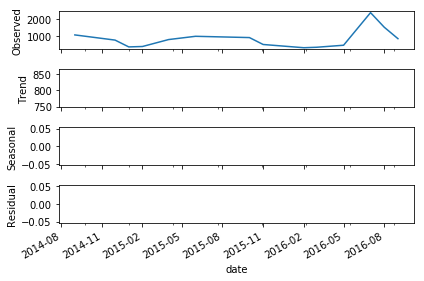

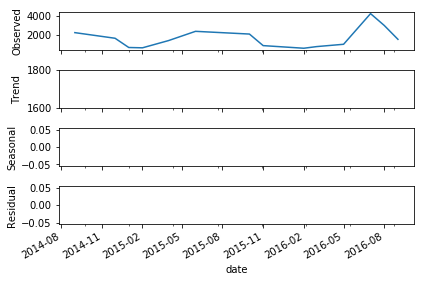

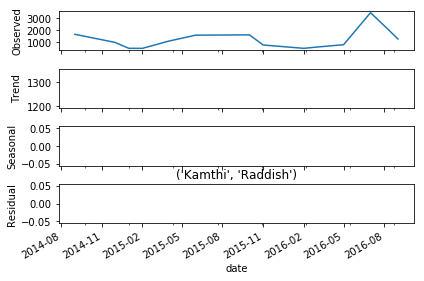

('Kamthi', 'SQUASH GOURD')
('Kamthi', 'Small Gourd')
('Kamthi', 'Spinach')
('Kamthi', 'Squash Gourd')
('Kamthi', 'Tomato')


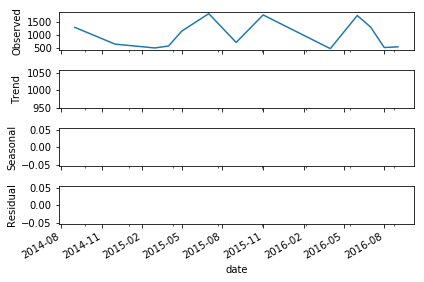

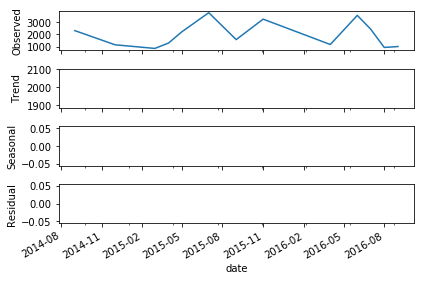

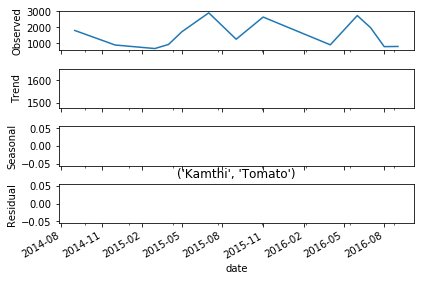

('Kamthi', 'WAL BHAJI')
('Kamthi', 'Wal Bhaji')
('Kamthi', 'Zendu')
('Kannad', 'Bajri')
('Kannad', 'Black Gram')
('Kannad', 'GRAM')
('Kannad', 'Ginger (Fresh)')
('Kannad', 'Gram')
('Kannad', 'Green Gram')
('Kannad', 'MAIZE')
('Kannad', 'Maize')
('Kannad', 'Pigeon Pea (Tur)')
('Kannad', 'Sorgum(Jawar)')
('Kannad', 'Wheat(Husked)')
('Karad', 'Apple')
('Karad', 'BANANA')
('Karad', 'BOR')
('Karad', 'BOTTLE GOURD')
('Karad', 'Banana')
('Karad', 'Bitter Gourd')
('Karad', 'Bor')
('Karad', 'Bottle Gourd')
('Karad', 'Brinjal')
('Karad', 'CABBAGE')
('Karad', 'CAPSICUM')
('Karad', 'CUCUMBER')
('Karad', 'CUSTARD APPLE')
('Karad', 'Cabbage')
('Karad', 'Capsicum')
('Karad', 'Carrot')
('Karad', 'Chikoo')
('Karad', 'Cluster Bean')
('Karad', 'Coriander  ')
('Karad', 'Cucumber')
('Karad', 'Custard Apple')
('Karad', 'Flower')
('Karad', 'GINGER (FRESH)')
('Karad', 'GREEN CHILLI')
('Karad', 'GREEN-PEAS')
('Karad', 'Garlic')
('Karad', 'Ghevda')
('Karad', 'Ginger (Fresh)')
('Karad', 'Grapes')
('Karad', 'Gree

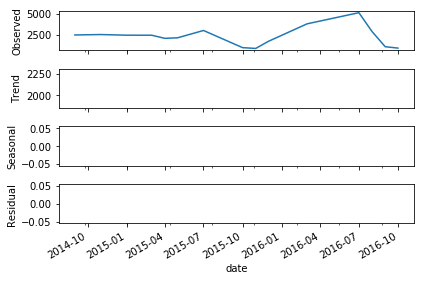

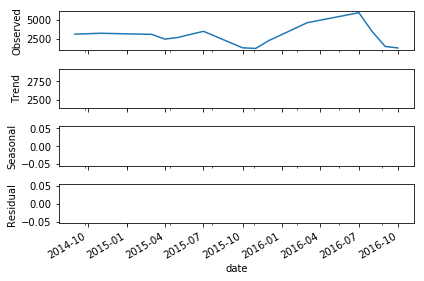

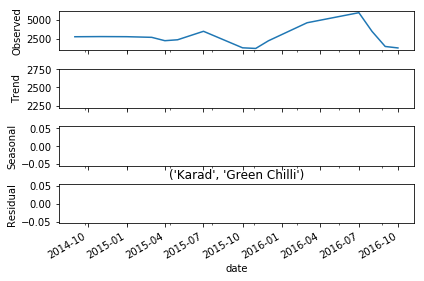

('Karad', 'Green-Peas')
('Karad', 'Ground Nut Pods (Dry)')
('Karad', 'Jaggery')
('Karad', 'LADIES FINGER')
('Karad', 'Ladies Finger')
('Karad', 'Lemon')
('Karad', 'Mango')
('Karad', 'Math (Bhaji)')
('Karad', 'Mosambi')
('Karad', 'Onion')


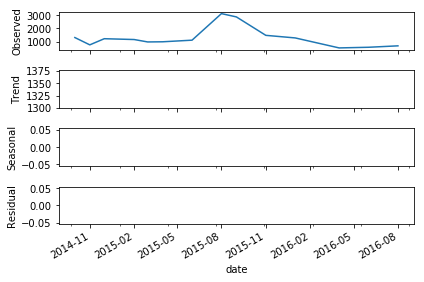

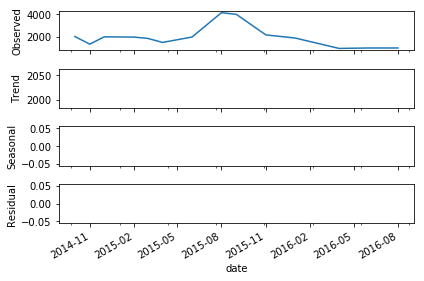

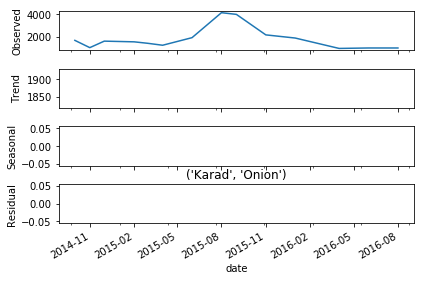

('Karad', 'Orange')
('Karad', 'Pavata')
('Karad', 'Pavtta')
('Karad', 'Pomegranate')
('Karad', 'Potato')
('Karad', 'Ridge Gourd')
('Karad', 'SNAKE GOURD')
('Karad', 'SWEET POTATO')
('Karad', 'Shevga')
('Karad', 'Snake Gourd')
('Karad', 'Spinach')
('Karad', 'Squash Gourd')
('Karad', 'Sweet Potato')
('Karad', 'TOMATO')
('Karad', 'Tomato')
('Karanja', 'Batbati')
('Karanja', 'Black Gram')
('Karanja', 'Cotton')
('Karanja', 'GRAM')
('Karanja', 'Gram')
('Karanja', 'Green Gram')
('Karanja', 'Ground Nut Pods (Dry)')
('Karanja', 'PIGEON PEA (TUR)')
('Karanja', 'Pigeon Pea (Tur)')


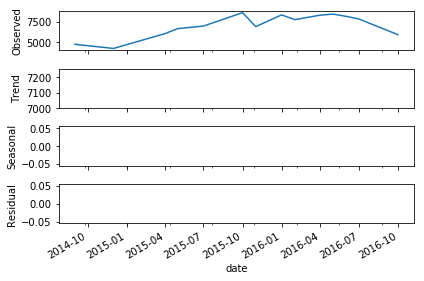

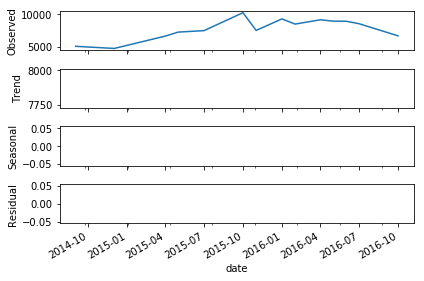

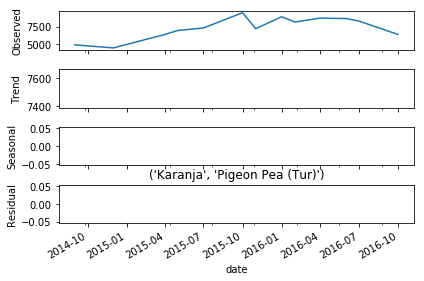

('Karanja', 'Sesamum')
('Karanja', 'Sorgum(Jawar)')
('Karanja', 'Soybean')
('Karanja', 'Sunflower')
('Karanja', 'Wheat(Husked)')
('Karjat (Raigad)', 'PADDY-UNHUSKED')
('Karjat (Raigad)', 'Paddy-Unhusked')
('Karjat (Raigad)', 'Rice(Paddy-Hus)')
('Karmala', 'BAJRI')
('Karmala', 'Bajri')
('Karmala', 'Black Gram')
('Karmala', 'Gram')
('Karmala', 'Green Gram')
('Karmala', 'Maize')
('Karmala', 'Sorgum(Jawar)')
('Karmala', 'Sunflower')
('Karmala', 'Wheat(Husked)')
('Katol', 'BLACK GRAM')
('Katol', 'Black Gram')
('Katol', 'COTTON')
('Katol', 'Cotton')
('Katol', 'Gram')
('Katol', 'Green Gram')
('Katol', 'Ground Nut Pods (Dry)')
('Katol', 'MAIZE')
('Katol', 'Maize')
('Katol', 'Mosambi')
('Katol', 'Orange')
('Katol', 'Pigeon Pea (Tur)')
('Katol', 'SOYBEAN')
('Katol', 'Sorgum(Jawar)')
('Katol', 'Soybean')
('Katol', 'Wheat(Husked)')
('Kej', 'BLACK GRAM')
('Kej', 'Bajri')
('Kej', 'Black Gram')
('Kej', 'Castor Seed')
('Kej', 'Coriander (Dry)')
('Kej', 'GREEN GRAM')
('Kej', 'Gram')
('Kej', 'Green Gram

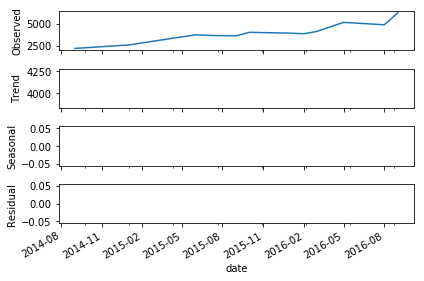

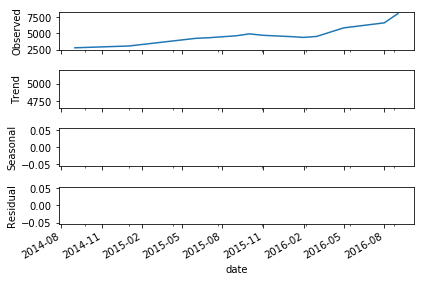

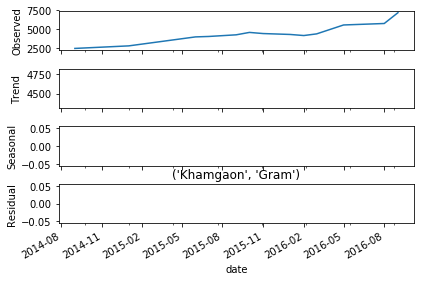

('Khamgaon', 'Green Gram')
('Khamgaon', 'Ground Nut Pods (Dry)')
('Khamgaon', 'He Buffalo')
('Khamgaon', 'Lemon')
('Khamgaon', 'Maize')
('Khamgaon', 'Male Goat')
('Khamgaon', 'Male Lamb')
('Khamgaon', 'Mustard')
('Khamgaon', 'Neem-Seed')
('Khamgaon', 'Pigeon Pea (Tur)')
('Khamgaon', 'SESAMUM')
('Khamgaon', 'SUNFLOWER')
('Khamgaon', 'Safflower')
('Khamgaon', 'Sesamum')
('Khamgaon', 'Sorgum(Jawar)')
('Khamgaon', 'Soybean')
('Khamgaon', 'Sunflower')
('Khamgaon', 'Wheat(Husked)')
('Khed', 'Brinjal')
('Khed', 'CLUSTER BEAN')
('Khed', 'CUCUMBER')
('Khed', 'Cabbage')
('Khed', 'Cluster Bean')
('Khed', 'Cucumber')
('Khed', 'Farshi')
('Khed', 'Ladies Finger')
('Khed', 'Raddish')
('Khed', 'Shepu')
('Khed (Shel Pimpalgaon)', 'Bitter Gourd')
('Khed (Shel Pimpalgaon)', 'Bottle Gourd')
('Khed (Shel Pimpalgaon)', 'Brinjal')
('Khed (Shel Pimpalgaon)', 'CLUSTER BEAN')
('Khed (Shel Pimpalgaon)', 'Cabbage')
('Khed (Shel Pimpalgaon)', 'Cluster Bean')
('Khed (Shel Pimpalgaon)', 'Coriander  ')
('Khed (Shel P

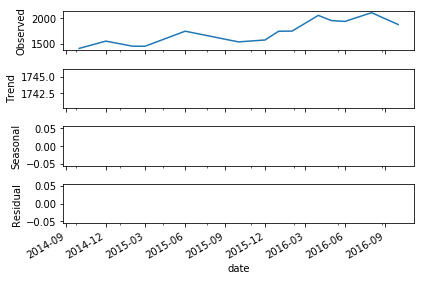

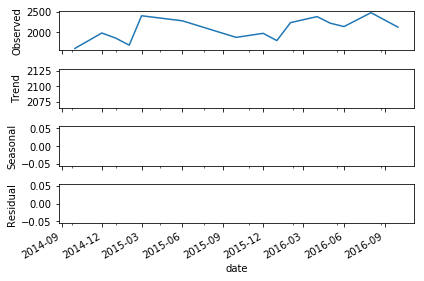

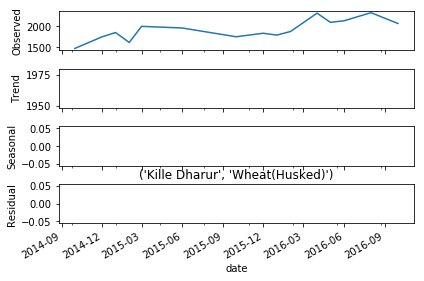

('Kinwat', 'Black Gram')
('Kinwat', 'Cotton')
('Kinwat', 'Gram')
('Kinwat', 'Green Gram')
('Kinwat', 'Ground Nut Pods (Dry)')
('Kinwat', 'Pigeon Pea (Tur)')
('Kinwat', 'Sorgum(Jawar)')
('Kinwat', 'Soybean')
('Kinwat', 'Wheat(Husked)')
('Kolhapur', 'APPLE')
('Kolhapur', 'Apple')
('Kolhapur', 'Awala')
('Kolhapur', 'BANANA')
('Kolhapur', 'BITTER GOURD')
('Kolhapur', 'BRINJAL')
('Kolhapur', 'Banana')
('Kolhapur', 'Beet Root')
('Kolhapur', 'Bitter Gourd')
('Kolhapur', 'Bor')
('Kolhapur', 'Bottle Gourd')
('Kolhapur', 'Brinjal')
('Kolhapur', 'CABBAGE')
('Kolhapur', 'CHIKOO')
('Kolhapur', 'CORIANDER ')
('Kolhapur', 'Cabbage')
('Kolhapur', 'Capsicum')
('Kolhapur', 'Carrot')
('Kolhapur', 'Chavli (Shenga )')
('Kolhapur', 'Chikoo')
('Kolhapur', 'Cluster Bean')
('Kolhapur', 'Coriander  ')
('Kolhapur', 'Cucumber')
('Kolhapur', 'Custard Apple')
('Kolhapur', 'Flower')
('Kolhapur', 'GARLIC')
('Kolhapur', 'Garlic')
('Kolhapur', 'Ghevda')
('Kolhapur', 'Ginger (Fresh)')
('Kolhapur', 'Grapes')
('Kolhapur',

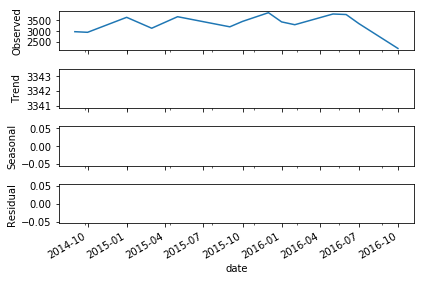

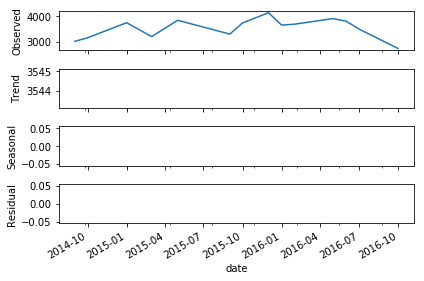

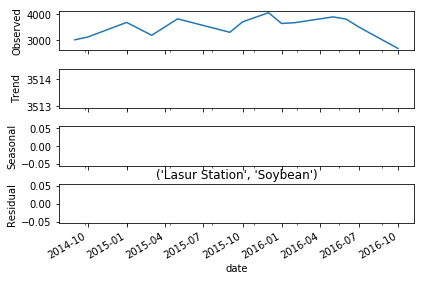

('Lasur Station', 'Thymol/Lovage')
('Lasur Station', 'Wheat(Husked)')
('Latur', 'BAJRI')
('Latur', 'BLACK GRAM')
('Latur', 'Bajri')
('Latur', 'Black Gram')
('Latur', 'CORIANDER (DRY)')
('Latur', 'Coriander (Dry)')
('Latur', 'Gram')
('Latur', 'Green Gram')
('Latur', 'Maize')
('Latur', 'Pigeon Pea (Tur)')
('Latur', 'Safflower')
('Latur', 'Sorgum(Jawar)')
('Latur', 'Soybean')
('Latur', 'Sunflower')
('Latur', 'Wheat(Husked)')
('Latur-Murud', 'GRAM')
('Latur-Murud', 'GREEN GRAM')
('Latur-Murud', 'Gram')
('Latur-Murud', 'Green Gram')
('Latur-Murud', 'Maize')
('Latur-Murud', 'Pigeon Pea (Tur)')
('Latur-Murud', 'SORGUM(JAWAR)')
('Latur-Murud', 'Safflower')
('Latur-Murud', 'Sorgum(Jawar)')
('Latur-Murud', 'Soybean')
('Latur-Murud', 'Sunflower')
('Latur-Murud', 'WHEAT(HUSKED)')
('Latur-Murud', 'Wheat(Husked)')
('Loha', 'BLACK GRAM')
('Loha', 'GREEN GRAM')
('Loha', 'Gram')
('Loha', 'Green Gram')
('Loha', 'Ground Nut Pods (Dry)')
('Loha', 'Pigeon Pea (Tur)')
('Loha', 'Safflower')
('Loha', 'Sorgum(

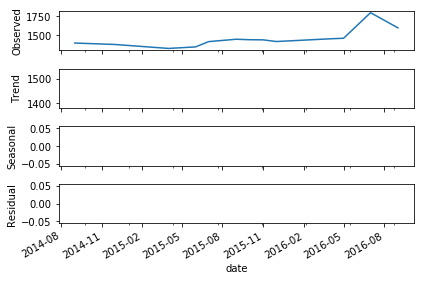

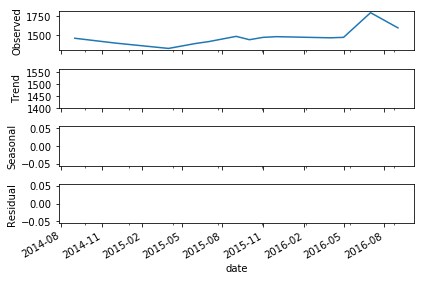

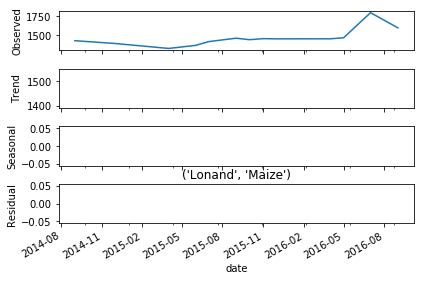

('Lonand', 'Onion')
('Lonand', 'SORGUM(JAWAR)')
('Lonand', 'Sorgum(Jawar)')
('Lonand', 'Wheat(Husked)')
('Lonar', 'BLACK GRAM')
('Lonar', 'Black Gram')
('Lonar', 'Gram')
('Lonar', 'Green Gram')
('Lonar', 'Maize')
('Lonar', 'Neem-Seed')
('Lonar', 'Pigeon Pea (Tur)')
('Lonar', 'Sorgum(Jawar)')
('Lonar', 'Soybean')
('Lonar', 'Wheat(Husked)')
('Mahad', 'Paddy-Unhusked')
('Mahagaon', 'Cotton')
('Mahagaon', 'GRAM')
('Mahagaon', 'Gram')
('Mahagaon', 'Sorgum(Jawar)')
('Mahur', 'Cotton')
('Mahur', 'Gram')
('Mahur', 'Ground Nut Pods (Dry)')
('Mahur', 'Soybean')
('Majalgaon', 'Bajri')
('Majalgaon', 'Cotton')
('Majalgaon', 'GRAM')
('Majalgaon', 'Gram')
('Majalgaon', 'Green Gram')
('Majalgaon', 'Ground Nut Pods (Dry)')
('Majalgaon', 'Pigeon Pea (Tur)')
('Majalgaon', 'SORGUM(JAWAR)')
('Majalgaon', 'Safflower')
('Majalgaon', 'Sesamum')
('Majalgaon', 'Sorgum(Jawar)')
('Majalgaon', 'Soybean')
('Majalgaon', 'Sunflower')
('Majalgaon', 'Wheat(Husked)')
('Malegaon', 'Bajri')
('Malegaon', 'Castor Seed')
('M

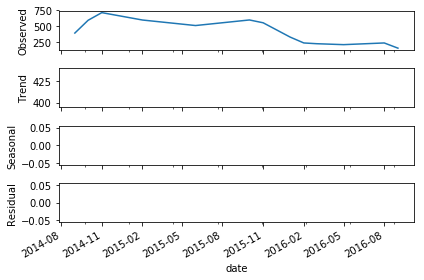

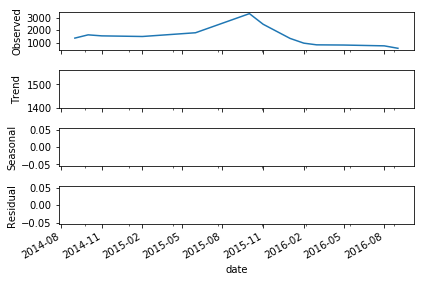

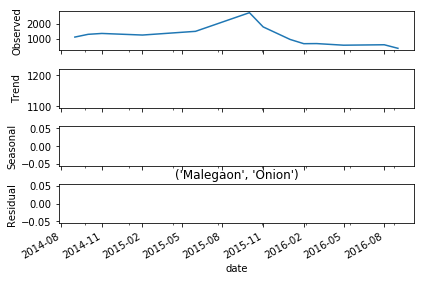

('Malegaon', 'Pigeon Pea (Tur)')
('Malegaon', 'SOYBEAN')
('Malegaon', 'Sorgum(Jawar)')
('Malegaon', 'Soybean')
('Malegaon', 'Wheat(Husked)')
('Malegaon (Washim)', 'Black Gram')
('Malegaon (Washim)', 'Bullack')
('Malegaon (Washim)', 'Gram')
('Malegaon (Washim)', 'Pigeon Pea (Tur)')
('Malegaon (Washim)', 'Sorgum(Jawar)')
('Malegaon (Washim)', 'Soybean')
('Malegaon (Washim)', 'Wheat(Husked)')
('Malkapur', 'BAJRI')
('Malkapur', 'Bajri')
('Malkapur', 'Black Gram')
('Malkapur', 'CHILLIES(RED)')
('Malkapur', 'COTTON')
('Malkapur', 'Chillies(Red)')
('Malkapur', 'Gram')
('Malkapur', 'Green Gram')
('Malkapur', 'Maize')
('Malkapur', 'Onion')
('Malkapur', 'PIGEON PEA (TUR)')
('Malkapur', 'Pigeon Pea (Tur)')
('Malkapur', 'Sorgum(Jawar)')
('Malkapur', 'Soybean')
('Malkapur', 'Wheat(Husked)')
('Manchar', 'BEET ROOT')
('Manchar', 'Beet Root')
('Manchar', 'Bitter Gourd')
('Manchar', 'Bottle Gourd')
('Manchar', 'Brinjal')
('Manchar', 'CHAVLI (SHENGA )')
('Manchar', 'CLUSTER BEAN')
('Manchar', 'Cabbage')

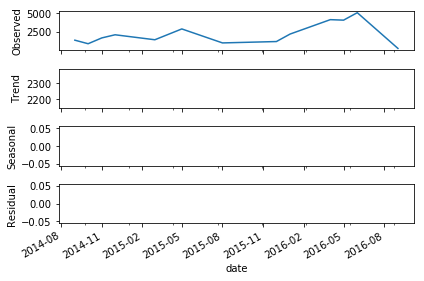

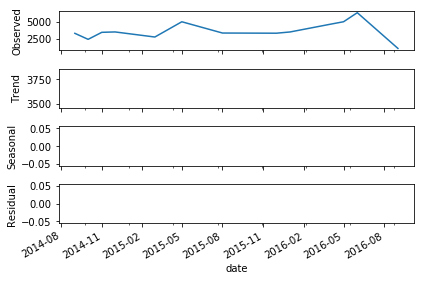

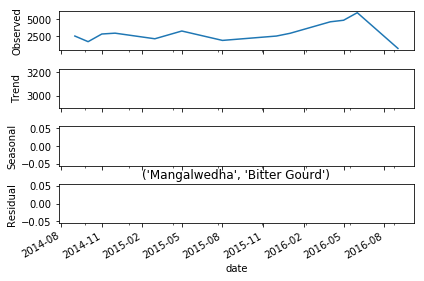

('Mangalwedha', 'Black Gram')
('Mangalwedha', 'Brinjal')
('Mangalwedha', 'CUCUMBER')
('Mangalwedha', 'Cucumber')
('Mangalwedha', 'Gram')
('Mangalwedha', 'Green Chilli')
('Mangalwedha', 'Green Gram')
('Mangalwedha', 'Horse Gram')
('Mangalwedha', 'Ladies Finger')
('Mangalwedha', 'Maize')
('Mangalwedha', 'Matki')
('Mangalwedha', 'PIGEON PEA (TUR)')
('Mangalwedha', 'Pigeon Pea (Tur)')
('Mangalwedha', 'Ridge Gourd')
('Mangalwedha', 'Sorgum(Jawar)')
('Mangalwedha', 'Tomato')
('Mangalwedha', 'Wheat(Husked)')
('Mangalwedha', 'Wheat(Unhusked)')
('Mangaon(Bhadav)', 'NACHANI')
('Mangaon(Bhadav)', 'Nachani')
('Mangaon(Bhadav)', 'Nagali')
('Mangaon(Bhadav)', 'Paddy-Unhusked')
('Mangaon(Bhadav)', 'RICE(PADDY-HUS)')
('Mangaon(Bhadav)', 'Rice(Paddy-Hus)')
('Mangrulpeer', 'Black Gram')
('Mangrulpeer', 'COTTON')
('Mangrulpeer', 'Gram')
('Mangrulpeer', 'Green Gram')
('Mangrulpeer', 'Pigeon Pea (Tur)')
('Mangrulpeer', 'SORGUM(JAWAR)')
('Mangrulpeer', 'SOYBEAN')
('Mangrulpeer', 'Sorgum(Jawar)')
('Mangrulpe

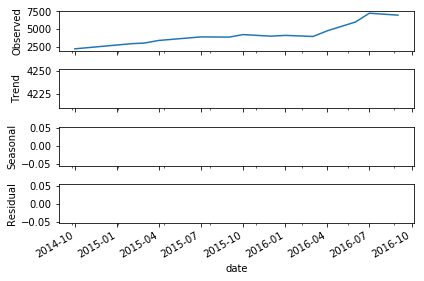

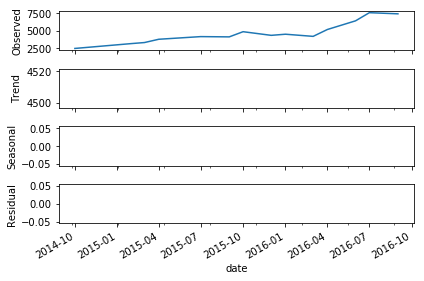

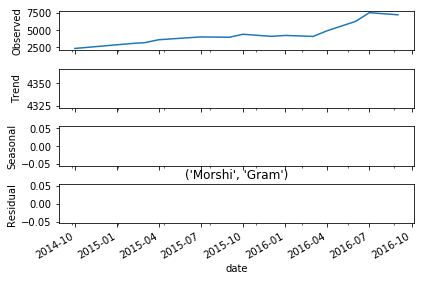

('Morshi', 'Green Chilli')
('Morshi', 'Green Gram')
('Morshi', 'Pigeon Pea (Tur)')
('Morshi', 'Sorgum(Jawar)')
('Morshi', 'Soybean')
('Morshi', 'WHEAT(HUSKED)')
('Morshi', 'Wheat(Husked)')


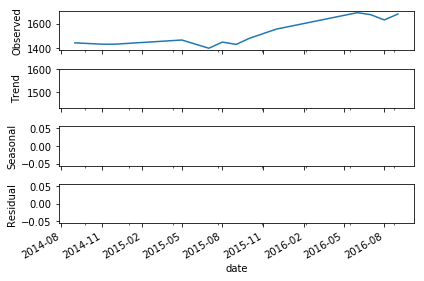

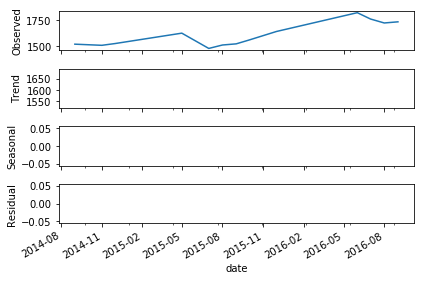

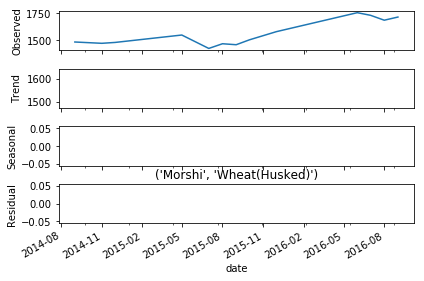

('Mudkhed', 'Pigeon Pea (Tur)')
('Mudkhed', 'Sorgum(Jawar)')
('Mudkhed', 'Wheat(Husked)')
('Mukhed', 'BLACK GRAM')
('Mukhed', 'Black Gram')
('Mukhed', 'Gram')
('Mukhed', 'Green Gram')
('Mukhed', 'Pigeon Pea (Tur)')
('Mukhed', 'Sorgum(Jawar)')
('Mukhed', 'Soybean')
('Mul', 'Paddy-Unhusked')
('Mumbai', 'ARVI')
('Mumbai', 'Apple')
('Mumbai', 'Arvi')
('Mumbai', 'BEET ROOT')
('Mumbai', 'Bajri')
('Mumbai', 'Beet Root')
('Mumbai', 'Betelnuts')
('Mumbai', 'Bitter Gourd')
('Mumbai', 'Bottle Gourd')
('Mumbai', 'Brinjal')
('Mumbai', 'CHILLIES(RED)')
('Mumbai', 'COCONUT')
('Mumbai', 'COWPEA')
('Mumbai', 'CUCUMBER')
('Mumbai', 'Cabbage')
('Mumbai', 'Capsicum')
('Mumbai', 'Cardamom')
('Mumbai', 'Carrot')
('Mumbai', 'Cashewnuts')
('Mumbai', 'Chikoo')
('Mumbai', 'Chillies(Red)')
('Mumbai', 'Cluster Bean')
('Mumbai', 'Coconut')
('Mumbai', 'Coriander (Dry)')
('Mumbai', 'Cowpea')


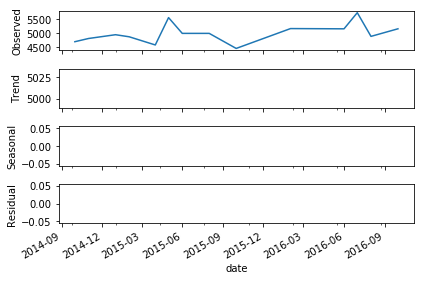

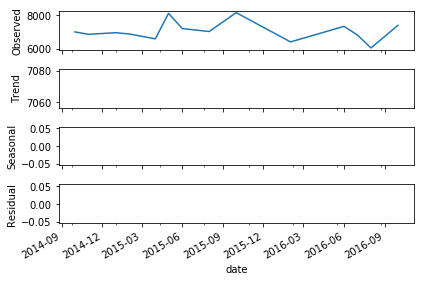

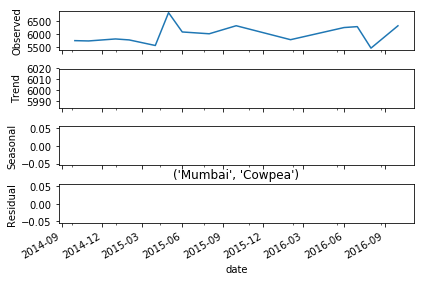

('Mumbai', 'Cucumber')


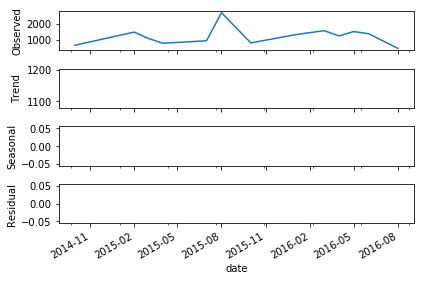

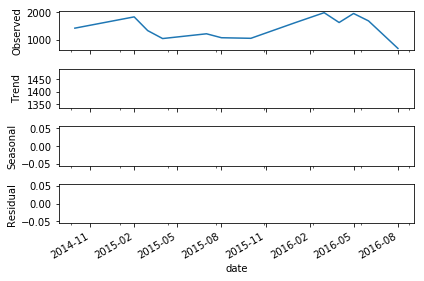

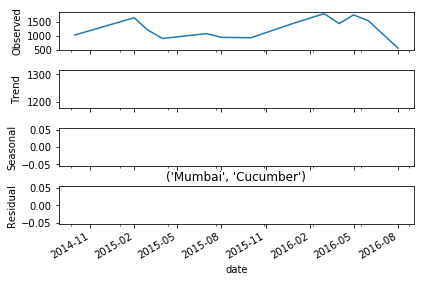

('Mumbai', 'Cummin')
('Mumbai', 'Curry Leaves')
('Mumbai', 'Custard Apple')
('Mumbai', 'Elephant Root')
('Mumbai', 'FLOWER')
('Mumbai', 'Fennel')
('Mumbai', 'Fenugreek')
('Mumbai', 'Flower')
('Mumbai', 'French Bean')
('Mumbai', 'GREEN-PEAS')
('Mumbai', 'Garlic')
('Mumbai', 'Ginger (Dry)')
('Mumbai', 'Gr.Nut Kernels')
('Mumbai', 'Grapes')
('Mumbai', 'Green Chilli')
('Mumbai', 'Green Gram')
('Mumbai', 'Green Peas (Dry)')
('Mumbai', 'Green-Peas')
('Mumbai', 'Ground Nut Pods (Dry)')
('Mumbai', 'Guava')
('Mumbai', 'Horse Gram')
('Mumbai', 'Jaggery')
('Mumbai', 'LADIES FINGER')
('Mumbai', 'Ladies Finger')
('Mumbai', 'Mango')
('Mumbai', 'Melon')
('Mumbai', 'Mosambi')
('Mumbai', 'Mustard')
('Mumbai', 'Onion')
('Mumbai', 'Orange')
('Mumbai', 'Papai')
('Mumbai', 'Pineapple')
('Mumbai', 'Pomegranate')
('Mumbai', 'Potato')
('Mumbai', 'RICE(PADDY-HUS)')
('Mumbai', 'Rice(Paddy-Hus)')
('Mumbai', 'Ridge Gourd')
('Mumbai', 'SMALL GOURD')
('Mumbai', 'SPILT PIGEON PEA')
('Mumbai', 'SPLIT GRAM')
('Mumbai'

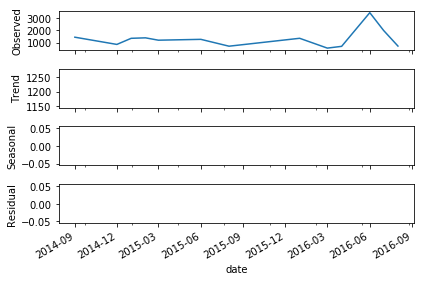

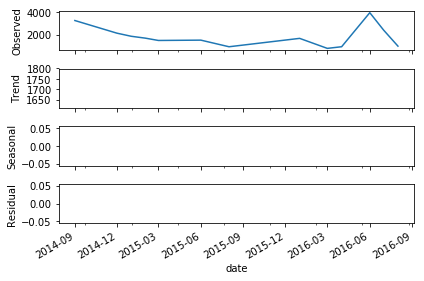

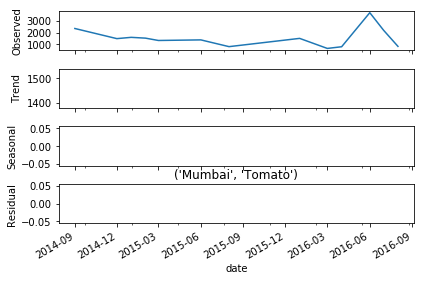

('Mumbai', 'Turmeric')
('Mumbai', 'Water Melon')
('Mumbai-Fruit Market', 'APPLE')
('Mumbai-Fruit Market', 'Apple')
('Mumbai-Fruit Market', 'BANANA')
('Mumbai-Fruit Market', 'Chikoo')
('Mumbai-Fruit Market', 'Custard Apple')
('Mumbai-Fruit Market', 'Fig')
('Mumbai-Fruit Market', 'Guava')
('Mumbai-Fruit Market', 'Jambhul')
('Mumbai-Fruit Market', 'KHARBUJ')
('Mumbai-Fruit Market', 'Litchi')
('Mumbai-Fruit Market', 'MELON')
('Mumbai-Fruit Market', 'Mango')
('Mumbai-Fruit Market', 'Mosambi')
('Mumbai-Fruit Market', 'Naspatti ')
('Mumbai-Fruit Market', 'Orange')
('Mumbai-Fruit Market', 'Papai')
('Mumbai-Fruit Market', 'Pineapple')
('Mumbai-Fruit Market', 'Pitch')
('Mumbai-Fruit Market', 'Pomegranate')
('Mumbai-Fruit Market', 'Water Melon')
('Mumbai-Onion And Potato Mkt', 'GARLIC')
('Mumbai-Onion And Potato Mkt', 'Garlic')
('Mumbai-Onion And Potato Mkt', 'Potato')
('Murbad', 'Bitter Gourd')


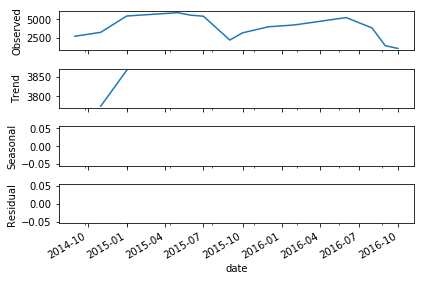

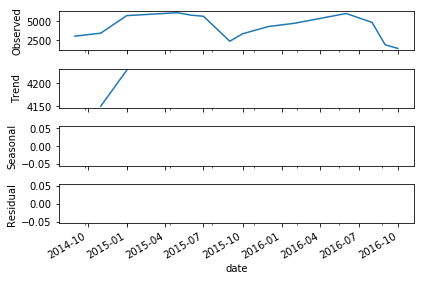

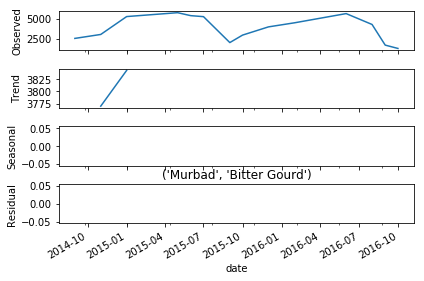

('Murbad', 'Bottle Gourd')
('Murbad', 'Brinjal')
('Murbad', 'CAPSICUM')
('Murbad', 'Cabbage')
('Murbad', 'Capsicum')
('Murbad', 'Ghevda')
('Murbad', 'Ghosali(Bhaji)')


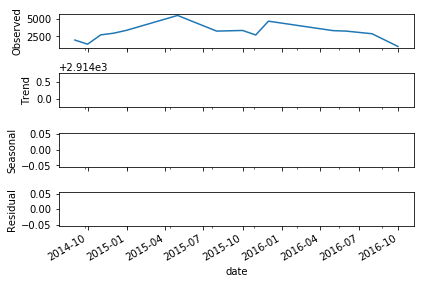

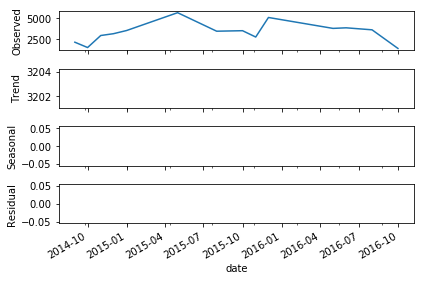

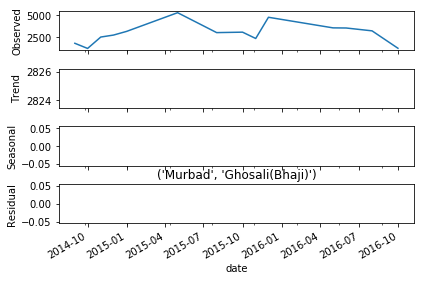

('Murbad', 'Ladies Finger')
('Murbad', 'Paddy-Unhusked')
('Murbad', 'Tomato')
('Murtizapur', 'Black Gram')
('Murtizapur', 'GRAM')
('Murtizapur', 'Gram')
('Murtizapur', 'Green Gram')
('Murtizapur', 'Pigeon Pea (Tur)')
('Murtizapur', 'Safflower')
('Murtizapur', 'Soybean')


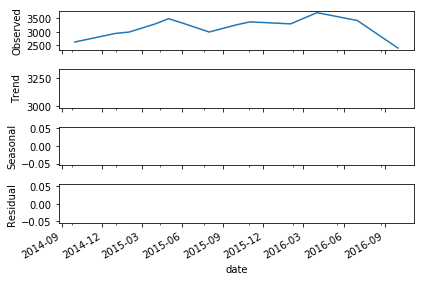

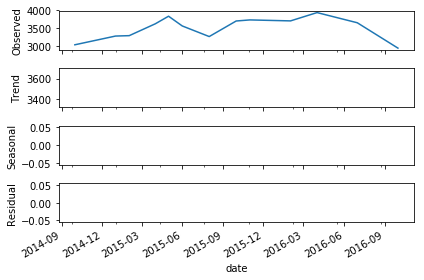

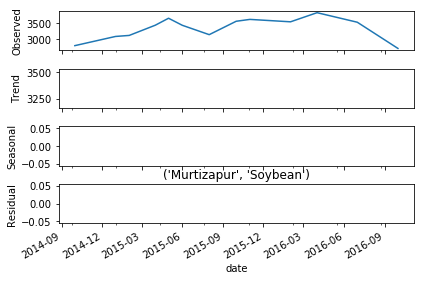

('Murtizapur', 'Wheat(Husked)')
('Murud', 'Paddy-Unhusked')
('Murud', 'Rice(Paddy-Hus)')
('Murum', 'Bajri')
('Murum', 'Black Gram')
('Murum', 'GREEN GRAM')
('Murum', 'Gram')
('Murum', 'Green Gram')
('Murum', 'Maize')
('Murum', 'PIGEON PEA (TUR)')
('Murum', 'Pigeon Pea (Tur)')
('Murum', 'SORGUM(JAWAR)')
('Murum', 'SOYBEAN')
('Murum', 'Sesamum')
('Murum', 'Sorgum(Jawar)')
('Murum', 'Soybean')
('Murum', 'Sunflower')
('Murum', 'Wheat(Husked)')
('Murum', 'Wheat(Unhusked)')
('Nagbhid', 'Paddy-Unhusked')
('Nagpur', 'APPLE')
('Nagpur', 'Apple')
('Nagpur', 'Awala')
('Nagpur', 'BOR')
('Nagpur', 'Banana')
('Nagpur', 'Beet Root')
('Nagpur', 'Bitter Gourd')
('Nagpur', 'Black Gram')
('Nagpur', 'Bor')
('Nagpur', 'Bottle Gourd')


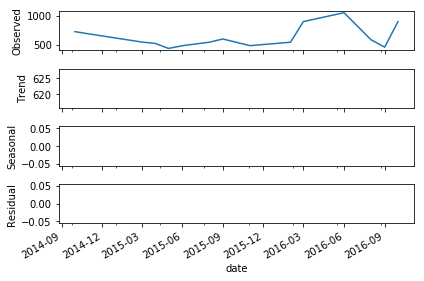

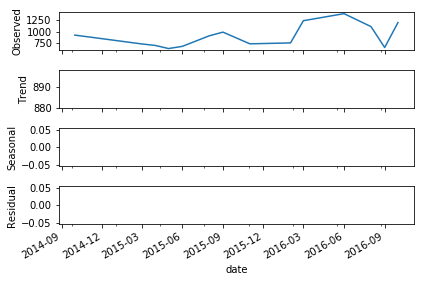

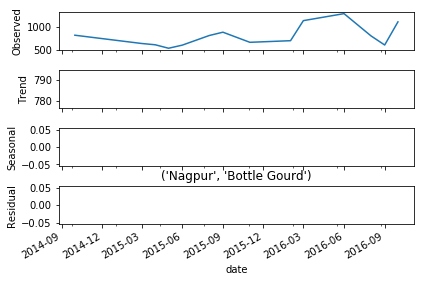

('Nagpur', 'Brinjal')
('Nagpur', 'CORIANDER ')
('Nagpur', 'CUSTARD APPLE')
('Nagpur', 'Cabbage')
('Nagpur', 'Capsicum')
('Nagpur', 'Carrot')
('Nagpur', 'Chavli (Pala)')
('Nagpur', 'Chavli (Shenga )')
('Nagpur', 'Chikoo')
('Nagpur', 'Chillies(Red)')
('Nagpur', 'Cluster Bean')
('Nagpur', 'Coriander  ')
('Nagpur', 'Coriander (Dry)')
('Nagpur', 'Cucumber')
('Nagpur', 'Dhemse')
('Nagpur', 'FLOWER')
('Nagpur', 'Fenugreek')
('Nagpur', 'Flower')
('Nagpur', 'Garlic')
('Nagpur', 'Ghosali(Bhaji)')
('Nagpur', 'Ginger (Dry)')
('Nagpur', 'Ginger (Fresh)')
('Nagpur', 'Gram')
('Nagpur', 'Grapes')
('Nagpur', 'Green Chilli')
('Nagpur', 'Green Gram')
('Nagpur', 'Green Peas (Dry)')
('Nagpur', 'Green-Peas')
('Nagpur', 'Ground Nut Pods (Dry)')
('Nagpur', 'Jack Fruit')
('Nagpur', 'Jambhul')
('Nagpur', 'LADIES FINGER')
('Nagpur', 'Ladies Finger')
('Nagpur', 'Lemon')
('Nagpur', 'Linseed')
('Nagpur', 'Maize')
('Nagpur', 'Maize(Corn.)')
('Nagpur', 'Mango')
('Nagpur', 'Mango(Raw)')
('Nagpur', 'Math (Bhaji)')
('Na

('Panvel', 'Bottle Gourd')
('Panvel', 'Brinjal')
('Panvel', 'CABBAGE')
('Panvel', 'CLUSTER BEAN')
('Panvel', 'Cabbage')
('Panvel', 'Cluster Bean')
('Panvel', 'Cucumber')
('Panvel', 'Flower')
('Panvel', 'Ghosali(Bhaji)')
('Panvel', 'Ladies Finger')
('Panvel', 'Ridge Gourd')
('Panvel', 'Snake Gourd')
('Panvel', 'Tomato')
('Paranda', 'Black Gram')
('Paranda', 'Cotton')
('Paranda', 'Green Gram')
('Paranda', 'Maize')
('Paranda', 'Onion')
('Paranda', 'Pigeon Pea (Tur)')
('Paranda', 'Sorgum(Jawar)')
('Paranda', 'Wheat(Husked)')
('Parbhani', 'Black Gram')
('Parbhani', 'Cotton')
('Parbhani', 'Gram')
('Parbhani', 'Green Gram')
('Parbhani', 'Pigeon Pea (Tur)')
('Parbhani', 'SOYBEAN')
('Parbhani', 'Sorgum(Jawar)')
('Parbhani', 'Soybean')
('Parbhani', 'Wheat(Husked)')
('Parli-Vaijnath', 'BAJRI')
('Parli-Vaijnath', 'Bajri')
('Parli-Vaijnath', 'Cotton')
('Parli-Vaijnath', 'Gram')
('Parli-Vaijnath', 'Green Gram')
('Parli-Vaijnath', 'Ground Nut Pods (Dry)')
('Parli-Vaijnath', 'PIGEON PEA (TUR)')
('Parl

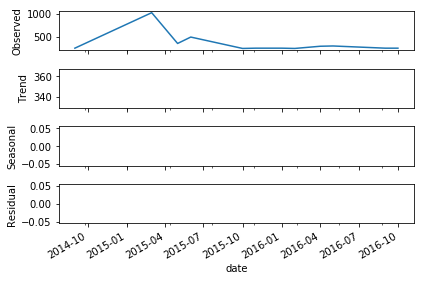

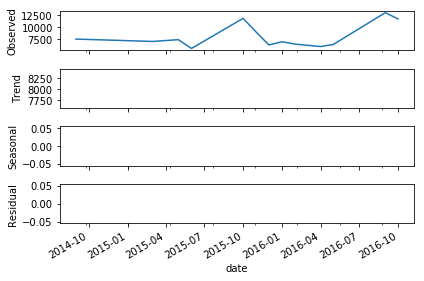

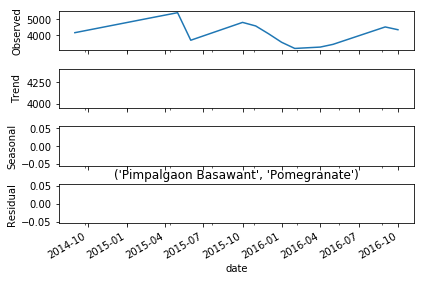

('Pimpalgaon Basawant', 'Tomato')
('Pombhurni', 'COTTON')
('Pombhurni', 'Cotton')
('Pombhurni', 'Paddy-Unhusked')
('Pulgaon', 'Cotton')
('Pulgaon', 'Gram')
('Pulgaon', 'Pigeon Pea (Tur)')
('Pulgaon', 'SOYBEAN')
('Pulgaon', 'Soybean')
('Pulgaon', 'Wheat(Husked)')
('Pune', 'Arvi')
('Pune', 'BEET ROOT')
('Pune', 'BOTTLE GOURD')
('Pune', 'Bajri')
('Pune', 'Banana(Raw)')
('Pune', 'Beet Root')
('Pune', 'Bijli')
('Pune', 'Bitter Gourd')
('Pune', 'Black Gram')
('Pune', 'Bottle Gourd')
('Pune', 'Brinjal')
('Pune', 'CARROT')
('Pune', 'CHILLIES(RED)')
('Pune', 'CLUSTER BEAN')
('Pune', 'CORIANDER (DRY)')
('Pune', 'Capsicum')
('Pune', 'Carrot')
('Pune', 'Chavli (Shenga )')
('Pune', 'Chikoo')
('Pune', 'Chillies(Red)')
('Pune', 'Cluster Bean')
('Pune', 'Coconut')
('Pune', 'Coriander (Dry)')
('Pune', 'Cucumber')
('Pune', 'Curry Leaves')
('Pune', 'Custard Apple')
('Pune', 'Dhemse')
('Pune', 'Double Bee')
('Pune', 'Elephant Root')
('Pune', 'Flower')
('Pune', 'GHOSALI(BHAJI)')
('Pune', 'GINGER (FRESH)')


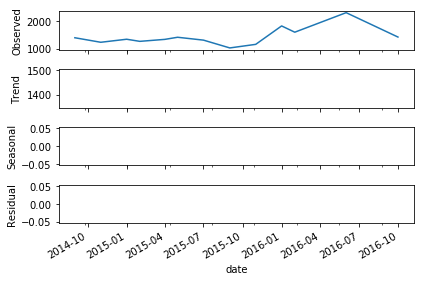

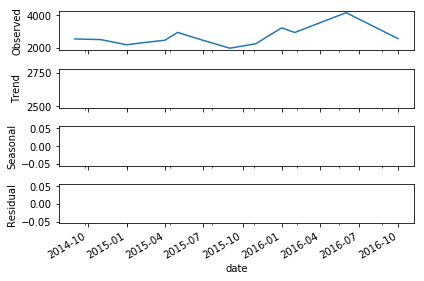

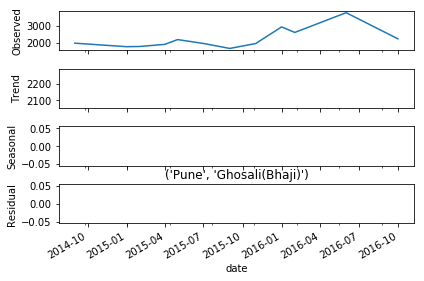

('Pune', 'Ginger (Fresh)')
('Pune', 'Gr.Nut Kernels')
('Pune', 'Gram')
('Pune', 'Green Chilli')
('Pune', 'Green Gram')
('Pune', 'Green Peas (Dry)')
('Pune', 'Green-Peas')
('Pune', 'Ground Nut Pods (Dry)')
('Pune', 'Gulchadi')
('Pune', 'Jack Fruit(Raw)')
('Pune', 'Jaggery')
('Pune', 'Kagda')
('Pune', 'Ladies Finger')
('Pune', 'Lemon')
('Pune', 'Lentil')
('Pune', 'MANGO(RAW)')
('Pune', 'Maize')
('Pune', 'Mango(Raw)')
('Pune', 'Mula Shenga')
('Pune', 'NOLKOL')
('Pune', 'Nolkol')
('Pune', 'Onion')
('Pune', 'Parwar')
('Pune', 'Pavtta')
('Pune', 'Pomegranate')
('Pune', 'Potato')
('Pune', 'Pumpkin')
('Pune', 'RICE(PADDY-HUS)')
('Pune', 'Raddish')
('Pune', 'Rajgira')
('Pune', 'Rice(Paddy-Hus)')


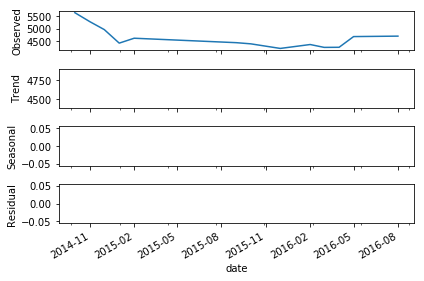

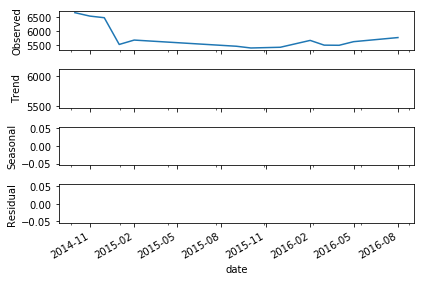

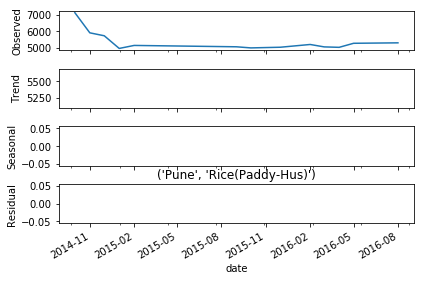

('Pune', 'Ridge Gourd')
('Pune', 'SHEVGA')
('Pune', 'SMALL GOURD')
('Pune', 'SPINACH')
('Pune', 'SWEET POTATO')
('Pune', 'Shepu')
('Pune', 'Shevga')
('Pune', 'Small Gourd')
('Pune', 'Snake Gourd')
('Pune', 'Sorgum(Jawar)')
('Pune', 'Squash Gourd')
('Pune', 'Sweet Potato')
('Pune', 'Tamarind')
('Pune', 'Terda')
('Pune', 'Tomato')
('Pune', 'Turmeric')
('Pune', 'WHEAT(HUSKED)')
('Pune', 'Wal Bhaji')
('Pune', 'Wal Papdi')
('Pune', 'Walvad')
('Pune', 'Wheat(Husked)')
('Pune-Manjri', 'Ambat Chuka')
('Pune-Manjri', 'BEET ROOT')
('Pune-Manjri', 'Beet Root')
('Pune-Manjri', 'Bitter Gourd')
('Pune-Manjri', 'Bottle Gourd')
('Pune-Manjri', 'Brinjal')
('Pune-Manjri', 'CHAVLI (PALA)')
('Pune-Manjri', 'CHAVLI (SHENGA )')
('Pune-Manjri', 'CURRY LEAVES')
('Pune-Manjri', 'CUSTARD APPLE')
('Pune-Manjri', 'Cabbage')
('Pune-Manjri', 'Carrot')
('Pune-Manjri', 'Chavli (Pala)')
('Pune-Manjri', 'Chavli (Shenga )')
('Pune-Manjri', 'Cluster Bean')
('Pune-Manjri', 'Coriander  ')
('Pune-Manjri', 'Cucumber')
('Pune

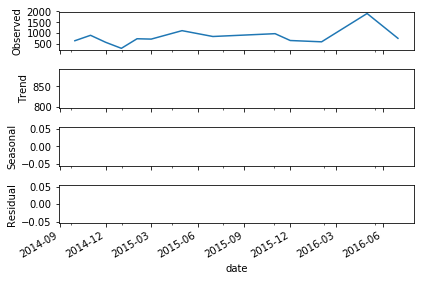

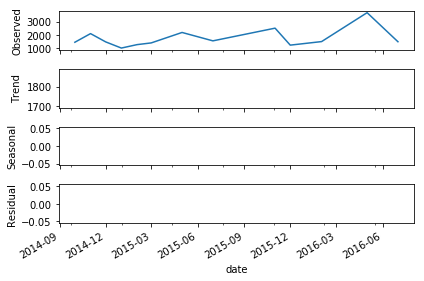

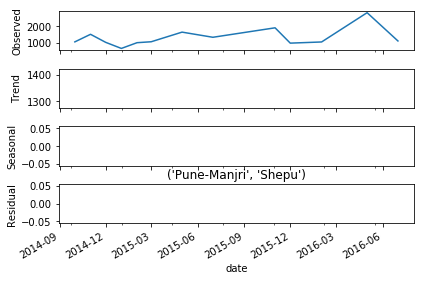

('Pune-Manjri', 'Spinach')
('Pune-Manjri', 'Squash Gourd')
('Pune-Manjri', 'Tomato')
('Pune-Manjri', 'Walvad')
('Pune-Moshi', 'BOTTLE GOURD')
('Pune-Moshi', 'Beet Root')
('Pune-Moshi', 'Bitter Gourd')
('Pune-Moshi', 'Bottle Gourd')
('Pune-Moshi', 'Brinjal')
('Pune-Moshi', 'CAPSICUM')
('Pune-Moshi', 'CARROT')
('Pune-Moshi', 'CHAVLI (SHENGA )')
('Pune-Moshi', 'Cabbage')
('Pune-Moshi', 'Carrot')
('Pune-Moshi', 'Chavli (Shenga )')
('Pune-Moshi', 'Cluster Bean')
('Pune-Moshi', 'Cucumber')
('Pune-Moshi', 'ELEPHANT ROOT')
('Pune-Moshi', 'Flower')
('Pune-Moshi', 'GARLIC')
('Pune-Moshi', 'GHEVDA')
('Pune-Moshi', 'GINGER (FRESH)')
('Pune-Moshi', 'GREEN CHILLI')
('Pune-Moshi', 'GREEN-PEAS')
('Pune-Moshi', 'Garlic')
('Pune-Moshi', 'Ghevda')
('Pune-Moshi', 'Ginger (Fresh)')
('Pune-Moshi', 'Green Chilli')
('Pune-Moshi', 'Ground Nut Pods (Dry)')
('Pune-Moshi', 'LADIES FINGER')
('Pune-Moshi', 'Ladies Finger')
('Pune-Moshi', 'Mango(Raw)')
('Pune-Moshi', 'Methi (Bhaji)')
('Pune-Moshi', 'Mint')
('Pune-Mo

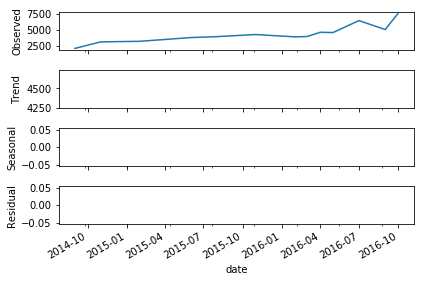

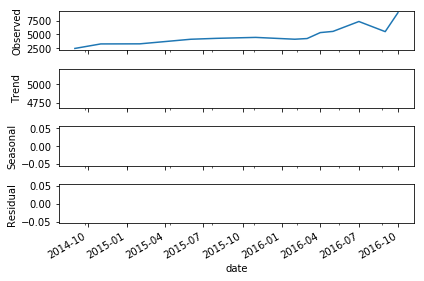

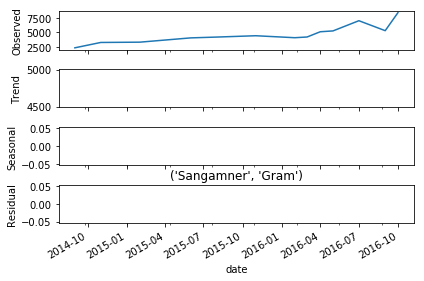

('Sangamner', 'Green Gram')
('Sangamner', 'Horse Gram')
('Sangamner', 'MAIZE')
('Sangamner', 'Maize')
('Sangamner', 'Matki')
('Sangamner', 'ONION')
('Sangamner', 'Onion')
('Sangamner', 'Pomegranate')
('Sangamner', 'Rice(Paddy-Hus)')
('Sangamner', 'Sorgum(Jawar)')
('Sangamner', 'Soybean')
('Sangamner', 'Tomato')
('Sangamner', 'Wheat(Husked)')
('Sangli-Miraj', 'MAIZE')
('Sangli-Miraj', 'Maize')
('Sangli-Miraj', 'Wheat(Unhusked)')
('Sangli-Phale Bhajipalam', 'APPLE')
('Sangli-Phale Bhajipalam', 'Apple')
('Sangli-Phale Bhajipalam', 'Bor')
('Sangli-Phale Bhajipalam', 'CHIKOO')
('Sangli-Phale Bhajipalam', 'CUSTARD APPLE')
('Sangli-Phale Bhajipalam', 'Chikoo')
('Sangli-Phale Bhajipalam', 'Custard Apple')
('Sangli-Phale Bhajipalam', 'Garlic')
('Sangli-Phale Bhajipalam', 'Ginger (Fresh)')
('Sangli-Phale Bhajipalam', 'Grapes')
('Sangli-Phale Bhajipalam', 'MOSAMBI')
('Sangli-Phale Bhajipalam', 'Mango')
('Sangli-Phale Bhajipalam', 'Mosambi')
('Sangli-Phale Bhajipalam', 'ORANGE')
('Sangli-Phale Bha

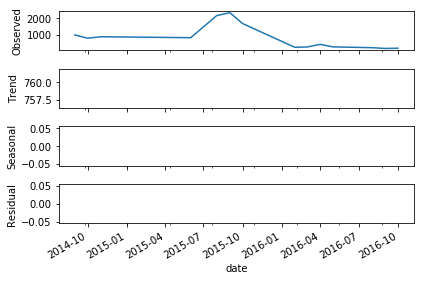

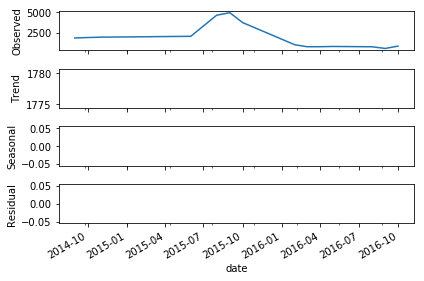

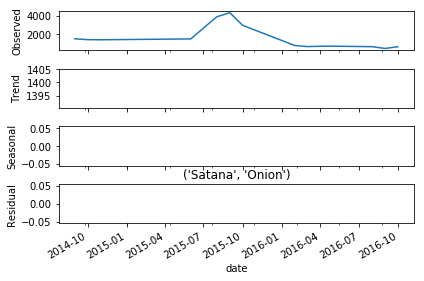

('Satana', 'Pigeon Pea (Tur)')
('Satana', 'Pomegranate')
('Satana', 'Rice(Paddy-Hus)')
('Satana', 'Sorgum(Jawar)')
('Satana', 'Soybean')
('Satana', 'Sunflower')
('Satana', 'Wheat(Husked)')
('Satara', 'BITTER GOURD')
('Satara', 'BOTTLE GOURD')
('Satara', 'Bitter Gourd')
('Satara', 'Bottle Gourd')
('Satara', 'Brinjal')
('Satara', 'CABBAGE')
('Satara', 'CAPSICUM')
('Satara', 'CARROT')
('Satara', 'CLUSTER BEAN')
('Satara', 'Cabbage')
('Satara', 'Capsicum')
('Satara', 'Carrot')
('Satara', 'Cluster Bean')
('Satara', 'Cucumber')
('Satara', 'FLOWER')
('Satara', 'Flower')
('Satara', 'GARLIC')
('Satara', 'Garlic')


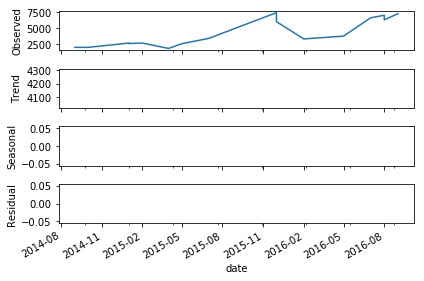

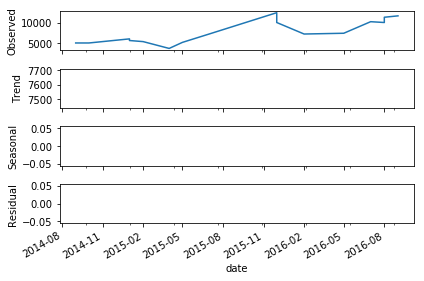

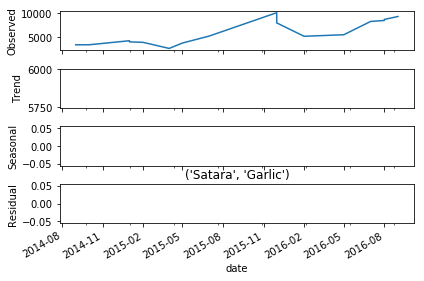

('Satara', 'Ghevda')
('Satara', 'Ginger (Fresh)')
('Satara', 'Green Chilli')
('Satara', 'Green-Peas')
('Satara', 'Ground Nut Pods (Dry)')
('Satara', 'Ladies Finger')
('Satara', 'ONION')
('Satara', 'Onion')
('Satara', 'PAVTTA')
('Satara', 'Pavtta')
('Satara', 'Potato')
('Satara', 'SHEVGA')
('Satara', 'Shevga')
('Satara', 'TOMATO')
('Satara', 'Tomato')
('Savali', 'Paddy-Unhusked')
('Savali', 'Pigeon Pea (Tur)')
('Savner', 'Cotton')
('Savner', 'Gram')
('Savner', 'Ground Nut Pods (Dry)')
('Savner', 'Maize')
('Savner', 'Pigeon Pea (Tur)')
('Savner', 'SOYBEAN')
('Savner', 'Sorgum(Jawar)')
('Savner', 'Soybean')
('Savner', 'WHEAT(HUSKED)')
('Savner', 'Wheat(Husked)')
('Sengaon', 'BLACK GRAM')
('Sengaon', 'Black Gram')
('Sengaon', 'GRAM')
('Sengaon', 'Gram')
('Sengaon', 'Green Gram')
('Sengaon', 'Ground Nut Pods (Dry)')
('Sengaon', 'Pigeon Pea (Tur)')
('Sengaon', 'Soybean')
('Sengaon', 'Turmeric')
('Sengaon', 'Wheat(Husked)')
('Shahada', 'BAJRI')
('Shahada', 'Bajri')
('Shahada', 'Black Gram')
(

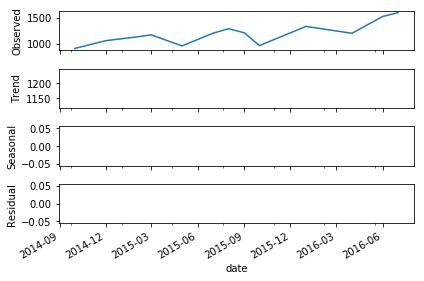

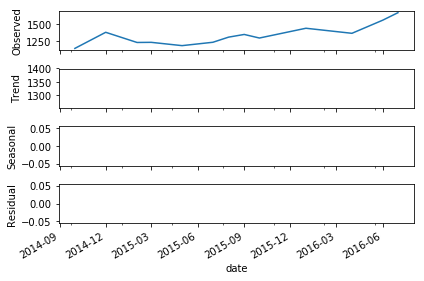

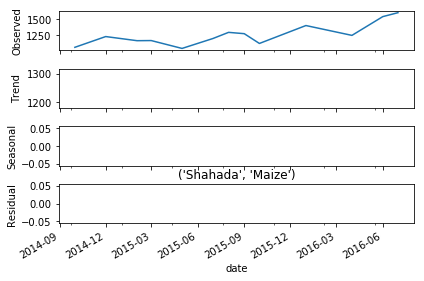

('Shahada', 'Matki')
('Shahada', 'Pigeon Pea (Tur)')
('Shahada', 'SORGUM(JAWAR)')
('Shahada', 'Sorgum(Jawar)')
('Shahada', 'Soybean')
('Shahada', 'Wheat(Husked)')
('Shahapur', 'Bhagar/Vari')
('Shahapur', 'Bitter Gourd')
('Shahapur', 'Brinjal')
('Shahapur', 'Capsicum')
('Shahapur', 'Chavli (Shenga )')
('Shahapur', 'Cluster Bean')
('Shahapur', 'Cucumber')
('Shahapur', 'Ghosali(Bhaji)')
('Shahapur', 'Ladies Finger')
('Shahapur', 'Mango(Raw)')
('Shahapur', 'Paddy-Unhusked')
('Shahapur', 'Ridge Gourd')
('Shahapur', 'Shevga')
('Shegaon', 'BLACK GRAM')
('Shegaon', 'Bajri')
('Shegaon', 'Black Gram')
('Shegaon', 'GRAM')
('Shegaon', 'Gram')
('Shegaon', 'Green Gram')
('Shegaon', 'MAIZE')
('Shegaon', 'Maize')
('Shegaon', 'Mustard')
('Shegaon', 'Pigeon Pea (Tur)')
('Shegaon', 'SOYBEAN')
('Shegaon', 'Sesamum')
('Shegaon', 'Sorgum(Jawar)')
('Shegaon', 'Soybean')
('Shegaon', 'Sunflower')
('Shegaon', 'Thymol/Lovage')
('Shegaon', 'Wheat(Husked)')
('Shevgaon', 'Bajri')
('Shevgaon', 'Cotton')
('Shevgaon',

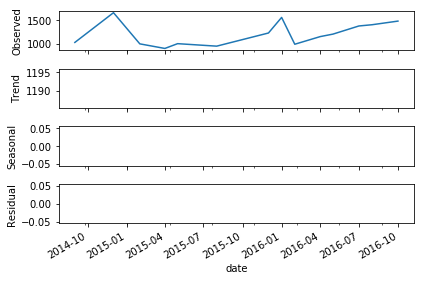

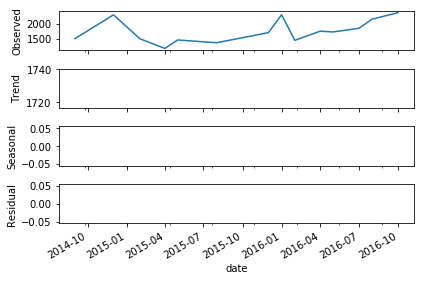

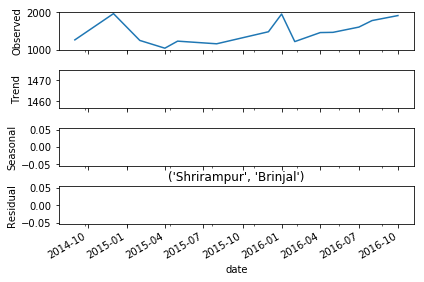

('Shrirampur', 'CAPSICUM')
('Shrirampur', 'CUSTARD APPLE')
('Shrirampur', 'Cabbage')
('Shrirampur', 'Capsicum')
('Shrirampur', 'Carrot')
('Shrirampur', 'Chikoo')
('Shrirampur', 'Cluster Bean')
('Shrirampur', 'Coriander  ')
('Shrirampur', 'Cowpea')
('Shrirampur', 'Cucumber')
('Shrirampur', 'Custard Apple')
('Shrirampur', 'FLOWER')
('Shrirampur', 'Fenugreek')
('Shrirampur', 'Flower')
('Shrirampur', 'GRAM')
('Shrirampur', 'GREEN GRAM')
('Shrirampur', 'Garlic')
('Shrirampur', 'Ghosali(Bhaji)')
('Shrirampur', 'Ginger (Fresh)')


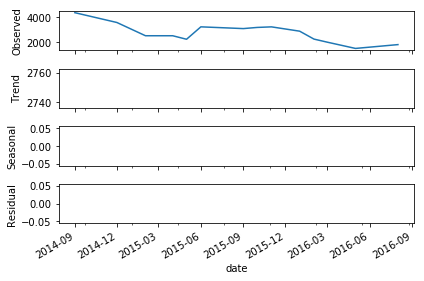

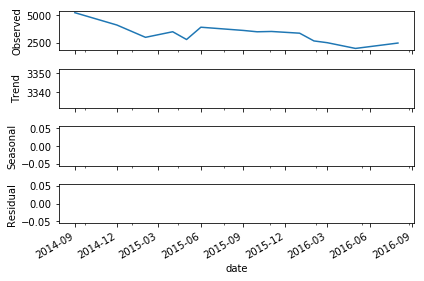

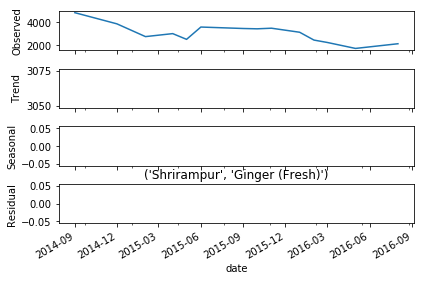

('Shrirampur', 'Gram')
('Shrirampur', 'Grapes')
('Shrirampur', 'Green Chilli')
('Shrirampur', 'Green Gram')
('Shrirampur', 'Green-Peas')
('Shrirampur', 'Ground Nut Pods (Dry)')
('Shrirampur', 'KARDAI')
('Shrirampur', 'LADIES FINGER')
('Shrirampur', 'LEMON')
('Shrirampur', 'Ladies Finger')
('Shrirampur', 'Lemon')
('Shrirampur', 'MAIZE')
('Shrirampur', 'Maize')
('Shrirampur', 'Maize(Corn.)')
('Shrirampur', 'Mango')
('Shrirampur', 'Mango(Raw)')
('Shrirampur', 'Mosambi')
('Shrirampur', 'Onion')


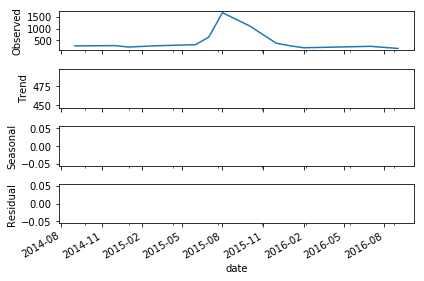

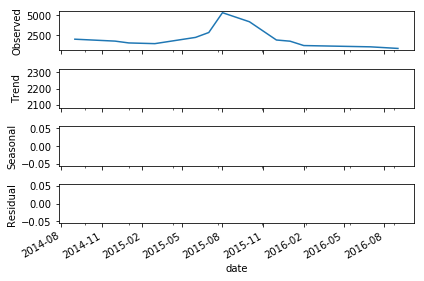

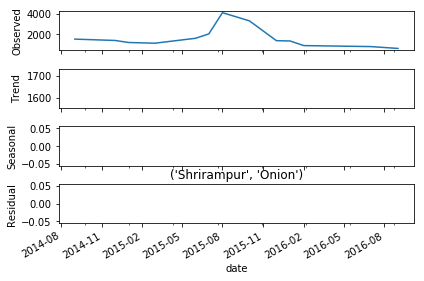

('Shrirampur', 'Orange')
('Shrirampur', 'Papai')
('Shrirampur', 'Pigeon Pea (Tur)')
('Shrirampur', 'Pomegranate')
('Shrirampur', 'Potato')
('Shrirampur', 'Radish')
('Shrirampur', 'Rice(Paddy-Hus)')
('Shrirampur', 'Shevga')
('Shrirampur', 'Sorgum(Jawar)')
('Shrirampur', 'Soybean')
('Shrirampur', 'Squash Gourd')
('Shrirampur', 'Sweet Potato')
('Shrirampur', 'Tamarind')
('Shrirampur', 'Tomato')
('Shrirampur', 'Wal Papdi')
('Shrirampur', 'Water Melon')
('Shrirampur', 'Wheat(Husked)')
('Shrirampur-Belapur', 'Bajri')
('Shrirampur-Belapur', 'Black Gram')
('Shrirampur-Belapur', 'GREEN GRAM')
('Shrirampur-Belapur', 'Gram')
('Shrirampur-Belapur', 'Maize')
('Shrirampur-Belapur', 'SOYBEAN')
('Shrirampur-Belapur', 'Sorgum(Jawar)')
('Shrirampur-Belapur', 'Soybean')
('Shrirampur-Belapur', 'WHEAT(HUSKED)')
('Shrirampur-Belapur', 'Wheat(Husked)')
('Sillod', 'Bajri')
('Sillod', 'Castor Seed')
('Sillod', 'Gram')
('Sillod', 'Green Gram')
('Sillod', 'MAIZE')
('Sillod', 'Maize')
('Sillod', 'Mustard')
('Sill

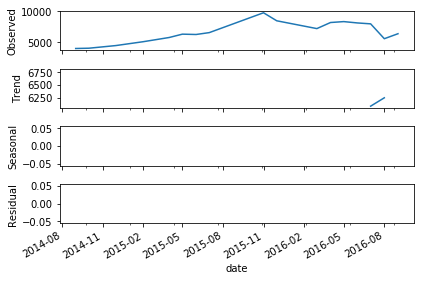

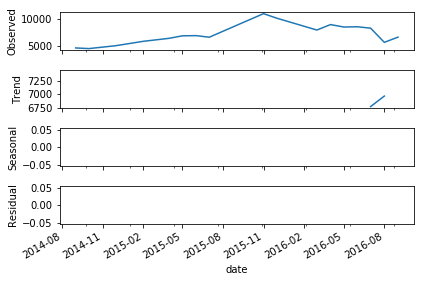

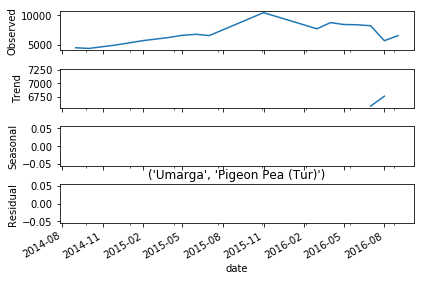

('Umarga', 'SORGUM(JAWAR)')
('Umarga', 'Safflower')
('Umarga', 'Sesamum')
('Umarga', 'Sorgum(Jawar)')
('Umarga', 'Soybean')
('Umarga', 'Sunflower')
('Umarga', 'WHEAT(HUSKED)')
('Umarga', 'WHEAT(UNHUSKED)')
('Umarga', 'Wheat(Husked)')
('Umarga', 'Wheat(Unhusked)')
('Umari', 'Gram')
('Umari', 'Green Gram')
('Umari', 'Pigeon Pea (Tur)')
('Umari', 'Sorgum(Jawar)')
('Umari', 'Soybean')
('Umarkhed', 'Cotton')
('Umarkhed', 'Gram')
('Umarkhed', 'Pigeon Pea (Tur)')
('Umarkhed', 'Sorgum(Jawar)')
('Umarkhed', 'Soybean')
('Umarkhed', 'Wheat(Husked)')
('Umarkhed-Danki', 'Gram')
('Umarkhed-Danki', 'Ground Nut Pods (Dry)')
('Umarkhed-Danki', 'Pigeon Pea (Tur)')
('Umarkhed-Danki', 'Sorgum(Jawar)')
('Umarkhed-Danki', 'Soybean')
('Umarkhed-Danki', 'Wheat(Husked)')
('Umrane', 'Onion')
('Vadgaon Peth', 'BRINJAL')
('Vadgaon Peth', 'Bitter Gourd')
('Vadgaon Peth', 'Bottle Gourd')
('Vadgaon Peth', 'Brinjal')
('Vadgaon Peth', 'CAPSICUM')
('Vadgaon Peth', 'CARROT')
('Vadgaon Peth', 'Cabbage')
('Vadgaon Peth', 

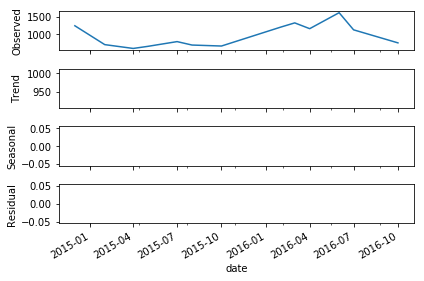

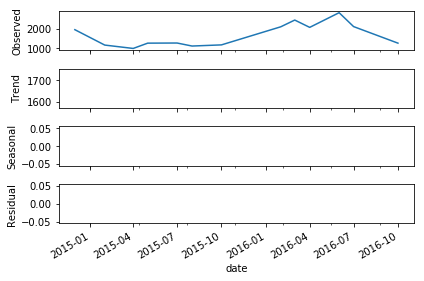

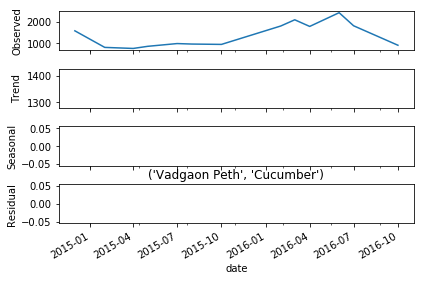

('Vadgaon Peth', 'FLOWER')
('Vadgaon Peth', 'Flower')
('Vadgaon Peth', 'Ghevda')
('Vadgaon Peth', 'Ginger (Fresh)')
('Vadgaon Peth', 'Green Chilli')
('Vadgaon Peth', 'Green-Peas')
('Vadgaon Peth', 'Harbara(Pendi)')
('Vadgaon Peth', 'Ladies Finger')
('Vadgaon Peth', 'Methi (Bhaji)')
('Vadgaon Peth', 'Onion')
('Vadgaon Peth', 'Pavtta')
('Vadgaon Peth', 'Ridge Gourd')
('Vadgaon Peth', 'SNAKE GOURD')
('Vadgaon Peth', 'Snake Gourd')
('Vadgaon Peth', 'Sweet Potato')
('Vadgaon Peth', 'Tomato')
('Vaduj', 'BAJRI')
('Vaduj', 'BLACK GRAM')
('Vaduj', 'Bajri')
('Vaduj', 'Cowpea')
('Vaduj', 'GRAM')
('Vaduj', 'Ghevda Seed')
('Vaduj', 'Gram')
('Vaduj', 'Green Gram')
('Vaduj', 'MAIZE')
('Vaduj', 'Maize')
('Vaduj', 'SORGUM(JAWAR)')
('Vaduj', 'Sorgum(Jawar)')
('Vaduj', 'Soybean')
('Vaduj', 'Wheat(Husked)')
('Vai', 'BRINJAL')
('Vai', 'Bottle Gourd')
('Vai', 'Brinjal')
('Vai', 'Cabbage')
('Vai', 'Coriander  ')
('Vai', 'Cucumber')


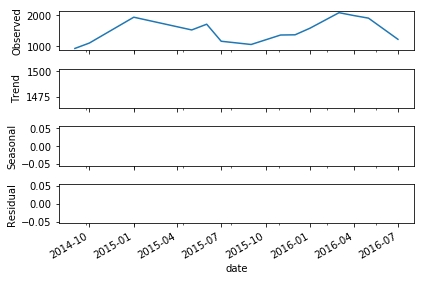

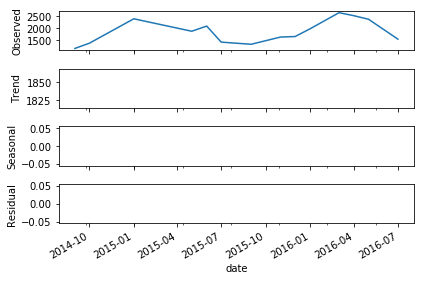

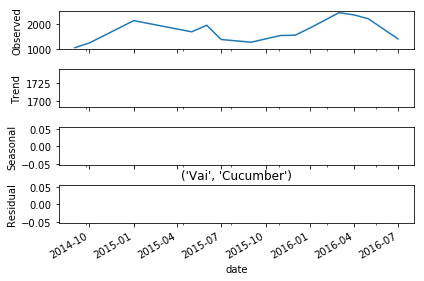

('Vai', 'Curry Leaves')
('Vai', 'Flower')
('Vai', 'Ginger (Fresh)')
('Vai', 'Goosefoot')
('Vai', 'Green Chilli')
('Vai', 'Green-Peas')
('Vai', 'Ladies Finger')
('Vai', 'Math (Bhaji)')
('Vai', 'Onion')
('Vai', 'PAVATA')
('Vai', 'PAVTTA')
('Vai', 'Pavata')
('Vai', 'Pavtta')
('Vai', 'RIDGE GOURD')
('Vai', 'Ridge Gourd')
('Vai', 'Shevga')
('Vai', 'Snake Gourd')
('Vai', 'Sorgum(Jawar)')
('Vai', 'Tomato')
('Vai', 'Turmeric')
('Vaijapur', 'BAJRI')
('Vaijapur', 'Bajri')
('Vaijapur', 'Black Gram')
('Vaijapur', 'COWPEA')
('Vaijapur', 'Castor Seed')
('Vaijapur', 'Cotton')
('Vaijapur', 'Cowpea')
('Vaijapur', 'GRAM')
('Vaijapur', 'Gram')
('Vaijapur', 'Green Gram')
('Vaijapur', 'Ground Nut Pods (Dry)')
('Vaijapur', 'Horse Gram')
('Vaijapur', 'LINSEED')
('Vaijapur', 'Lentil')
('Vaijapur', 'Maize')
('Vaijapur', 'Matki')
('Vaijapur', 'Mustard')
('Vaijapur', 'Nagali')
('Vaijapur', 'Onion')
('Vaijapur', 'PIGEON PEA (TUR)')
('Vaijapur', 'Pigeon Pea (Tur)')
('Vaijapur', 'SORGUM(JAWAR)')
('Vaijapur', 'SOYBE

In [37]:
for k, df in sdata.groupby(["APMC", "Commodity"]):
    print(k)    
    mi = df["min_price"]
    ma = df["max_price"]
    mo = df["modal_price"]
    if len(mo) > 12:
        midec = seasonal_decompose(mi, model = 'additive', freq = 12)
        madec = seasonal_decompose(ma, model = 'additive', freq = 12)
        modec = seasonal_decompose(mo, model = 'additive', freq = 12)
        midec.plot()
        madec.plot()
        modec.plot()
        plt.title(k)
        plt.show()

**Looking through the graphs, it can be inferred that most of the clusters do not follow seasonal fluctuations and trends** <br/>
**Frequency set to 12 because values are recorded on monthly basis**

In [31]:
print(r)

date
2016-03-01   NaN
2015-09-01   NaN
2016-07-01   NaN
2016-01-01   NaN
2015-06-01   NaN
2015-11-01   NaN
2015-05-01   NaN
2016-04-01   NaN
2016-05-01   NaN
2014-10-01   NaN
2015-07-01   NaN
2015-01-01   NaN
2014-09-01   NaN
2015-12-01   NaN
Name: min_price, dtype: float64
